 ## Introduction 

The goal of this project is to support decision making for an online car ads company by analyzing which factors influence the
price of a vehicle, and determine what parameters affect the lifespan of an ad. 

## Outline of analysis

* Assessed the data, and made decisions about dealing with missing, outliers, and mismatched values.
* Performed EDA analysis using Pandas, Numpy, Matplotlib, and Seaborn.
* Analyzed both numeric and categorical variables, studied core parameters, and 
* Reached conclusions backed by statistical inferences regarding ads lifespan and top car models.  




## Initialization

[Load libraries that you believe are required for the project. You may realise later that you need additional libraries as you go, which is totally fine - just make sure to update this section when you do.]

In [1]:
# Loading all the libraries
import pandas as pd 
import matplotlib
import numpy as np
import seaborn as sns



In [2]:
# Removing warnings:
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Load data

In [3]:
# Load the data file into a DataFrame
try:
    cars = pd.read_csv('vehicles_us.csv')
except:
    cars = pd.read_csv('/datasets/vehicles_us.csv')


### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `type` — SUV, pickup, etc.
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal



In [4]:
# print the general/summary information about the DataFrame
cars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
# Checking for NaNs percentage: 
cars.isnull().sum()/ cars.shape[0] * 100

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

In [6]:
# print the general/summary information about the DataFrame
cars.describe()


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [7]:
# print the general/summary information about the DataFrame
cars.describe(include = object)


,model,condition,fuel,transmission,type,paint_color,date_posted
count,51525,51525,51525,51525,51525,42258,51525
unique,100,6,5,3,13,12,354
top,ford f-150,excellent,gas,automatic,SUV,white,2019-03-17
freq,2796,24773,47288,46902,12405,10029,186


In [8]:
# print a sample of data
cars

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


### First insights

- Initial dataframe consists of: 51,525 rows in 13 columns.
- NaN values under: 
    - model_year (3619 values, 7% of total), 
    - cylinders (5260 values, 10.2% of total), 
    - odometer (7892 values, 15.3% of total), 
    - paint_color (9267 values, 18% of total), 
    - **is_4wd (25953 values, 50.3% of total)**
    

- is_4wd variable is a boolean. NaNs probably stand for '0', aka cars without 4wd.  


- date_posted type better be altered to 'datetime' type 


- average price (12,132) seems a bit low. 
- 'price' column contains some unrealistic values (such as 1 USD).


- average odometer (average mileage) value seems a bit high.
- some odometer values equal 0. A good idea would be to check if that makes sense. 
- odometer max value is extremly high (990,000). Probably an outlier. 


- There are no negative numeric values, which is a good thing here. 
- Need to check for duplicates.

### Further steps

Next step will focus on exploring missing values:
- NaNs under each column cover big parts of the population. Therefore deleting them would seem unwise. If possible, I shall fill them in, and if not, shall leave them as is. 

- a brief check whether model_year NaNs belong to any specific model. Then, finding the median manufacture year per model, and filling the model_year NaNs based on these medians.  

- Will check cillinders NaNs vis-a-vis model and model_year. Should fill in the NaNs based on median-number-of-cylinders per model per year. 

- Check odometer NaNs vis-a-vis car model and car condition. 

- Color NaNs: a brief check whether correlated with any specific model / year. Not much to do here, since there's no possible way to fill them in.  
- is_4wd NaNs: Since this is a boolean, there's chance the NaNs belong to cars without 4wd. Shall look into it. 

- The above steps will allow to assess whether of the NaNs were caused due to a software problem. If so, the engineering team should be notified. 


Next, shall calculate the vehicle's age and average mileage per year.


Next, will move on to study the core parameters (price, vehicle's age, mileage, cylinders, and condition) with & without outliers.



## Treat missing values 

### **Treating model_year NaNs:**

In [9]:
# NaNs - model_year:
cars.loc[cars['model_year'].isnull()]


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


In [10]:
# NaNs - model_year Vs model:
model_year_nans = cars.loc[cars['model_year'].isnull()]
model_year_nans['model'].value_counts().sort_values(ascending = False)

ford f-150                           191
chevrolet silverado 1500             155
ram 1500                             117
chevrolet silverado                   98
honda accord                          80
                                    ... 
chevrolet silverado 3500hd            14
hyundai santa fe                      13
acura tl                              12
honda civic lx                        11
mercedes-benz benze sprinter 2500      7
Name: model, Length: 100, dtype: int64

In [11]:
# Num. of unique models
len(cars['model'].unique())

100

Missing model years are spread across all the models. 

In [12]:
# Calculating median years per model:
median_year_per_model = cars.groupby('model')['model_year'].median()
median_year_per_model

model
acura tl             2007.0
bmw x5               2010.0
buick enclave        2012.0
cadillac escalade    2009.0
chevrolet camaro     2013.0
                      ...  
toyota sienna        2008.0
toyota tacoma        2010.0
toyota tundra        2009.0
volkswagen jetta     2012.0
volkswagen passat    2013.0
Name: model_year, Length: 100, dtype: float64

In [13]:
# Fill model_year NaNs based on median_year_per_model
for car_model in median_year_per_model.index:
    cars.loc[(cars.model == car_model) & (cars.model_year.isnull()), 'model_year'] = median_year_per_model[car_model] 
cars['model_year']

0        2011.0
1        2011.0
2        2013.0
3        2003.0
4        2017.0
          ...  
51520    2013.0
51521    2002.0
51522    2009.0
51523    2013.0
51524    2014.0
Name: model_year, Length: 51525, dtype: float64

**model_year column is now complete.**

### **Treating Cylinders NaNs:**

In [14]:
# NaNs - cylinders:
cars.loc[cars['cylinders'].isnull()].head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,NaN,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,NaN,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,NaN,2019-01-23,17


In [15]:
# distribution (percentage) of cylinders NaNs Vs model:
cylinder_nan_per_model = cars.loc[cars['cylinders'].isnull()]
cylinder_nan_per_model['model'].value_counts(normalize = True)

ford f-150                           0.060076
chevrolet silverado 1500             0.043916
ram 1500                             0.035171
chevrolet silverado                  0.026046
ram 2500                             0.023194
                                       ...   
ford f350 super duty                 0.003802
ford f150 supercrew cab xlt          0.003802
dodge dakota                         0.003422
bmw x5                               0.003042
mercedes-benz benze sprinter 2500    0.001331
Name: model, Length: 100, dtype: float64

In [16]:
# Looking at number-of-cylinders per model per model_yaer:

cars.groupby(['model', 'model_year'])['cylinders']

for name, group in cars.groupby(['model', 'model_year'])['cylinders']:
    print(name)
    print(group)
    print('\n')

('acura tl', 1999.0)
161      6.0
33379    NaN
40258    6.0
Name: cylinders, dtype: float64


('acura tl', 2001.0)
3540     6.0
3785     6.0
21593    6.0
32223    6.0
32492    6.0
42617    6.0
Name: cylinders, dtype: float64


('acura tl', 2002.0)
13724    6.0
29310    6.0
Name: cylinders, dtype: float64


('acura tl', 2003.0)
8744     6.0
19371    6.0
23124    NaN
25619    6.0
28368    6.0
30592    6.0
30654    6.0
33040    6.0
35164    6.0
51058    6.0
Name: cylinders, dtype: float64


('acura tl', 2004.0)
8107     6.0
8554     6.0
9370     6.0
13588    6.0
15330    6.0
16144    6.0
19827    6.0
24615    6.0
27524    6.0
32048    4.0
33424    6.0
34158    6.0
41789    6.0
45277    NaN
46065    6.0
49514    6.0
Name: cylinders, dtype: float64


('acura tl', 2005.0)
1862     6.0
4758     6.0
5993     6.0
6118     6.0
8096     6.0
8183     6.0
10583    6.0
11246    6.0
13307    6.0
14514    6.0
15290    6.0
16593    6.0
17375    NaN
23110    6.0
23529    6.0
24930    6.0
25471    6.0
25

Name: cylinders, dtype: float64


('cadillac escalade', 2013.0)
3682     8.0
16697    8.0
20666    8.0
26128    8.0
28446    8.0
45505    8.0
Name: cylinders, dtype: float64


('cadillac escalade', 2014.0)
21431    8.0
Name: cylinders, dtype: float64


('cadillac escalade', 2015.0)
679      8.0
4366     8.0
8012     8.0
20424    8.0
22488    8.0
26633    8.0
26743    8.0
26886    8.0
30871    NaN
35971    NaN
36580    8.0
39958    8.0
40190    8.0
41830    8.0
46960    8.0
49653    8.0
50285    8.0
Name: cylinders, dtype: float64


('cadillac escalade', 2016.0)
610      8.0
2020     8.0
2452     8.0
2945     8.0
4935     8.0
5114     8.0
5552     8.0
9155     8.0
28556    8.0
29305    8.0
36591    NaN
40865    8.0
44429    8.0
48740    8.0
Name: cylinders, dtype: float64


('cadillac escalade', 2017.0)
6484     NaN
6924     8.0
20426    8.0
21197    8.0
37163    8.0
38397    8.0
39192    8.0
46449    8.0
48085    8.0
Name: cylinders, dtype: float64


('cadillac escalade', 2018.0)
4220 

Name: cylinders, dtype: float64


('chevrolet corvette', 1985.0)
853      8.0
3965     8.0
8323     8.0
22057    8.0
22189    8.0
22490    8.0
32612    8.0
33249    8.0
35298    8.0
Name: cylinders, dtype: float64


('chevrolet corvette', 1986.0)
4099     8.0
13061    8.0
34801    8.0
38835    NaN
41866    8.0
43966    8.0
44821    8.0
46052    8.0
46611    8.0
48218    8.0
Name: cylinders, dtype: float64


('chevrolet corvette', 1987.0)
1940     8.0
6024     8.0
17269    8.0
17692    8.0
21270    8.0
21354    NaN
37750    8.0
46761    8.0
47160    8.0
Name: cylinders, dtype: float64


('chevrolet corvette', 1988.0)
13265    8.0
17424    8.0
25616    8.0
28473    8.0
29494    8.0
33928    8.0
40109    8.0
40761    8.0
41290    8.0
42936    8.0
47150    8.0
Name: cylinders, dtype: float64


('chevrolet corvette', 1989.0)
36257    8.0
45693    8.0
47498    8.0
48416    8.0
Name: cylinders, dtype: float64


('chevrolet corvette', 1990.0)
9746     8.0
12324    8.0
12513    8.0
14095    8.0

33007    8.0
40089    8.0
Name: cylinders, dtype: float64


('chevrolet impala', 1961.0)
34251    8.0
Name: cylinders, dtype: float64


('chevrolet impala', 1962.0)
21083    6.0
Name: cylinders, dtype: float64


('chevrolet impala', 1963.0)
4379     8.0
33257    NaN
Name: cylinders, dtype: float64


('chevrolet impala', 1964.0)
45362    8.0
Name: cylinders, dtype: float64


('chevrolet impala', 1965.0)
27328    8.0
39872    8.0
Name: cylinders, dtype: float64


('chevrolet impala', 1966.0)
7517     8.0
38608    NaN
47453    8.0
Name: cylinders, dtype: float64


('chevrolet impala', 1977.0)
43772    8.0
Name: cylinders, dtype: float64


('chevrolet impala', 1979.0)
34233    8.0
Name: cylinders, dtype: float64


('chevrolet impala', 1983.0)
24505    8.0
Name: cylinders, dtype: float64


('chevrolet impala', 1994.0)
3748    8.0
Name: cylinders, dtype: float64


('chevrolet impala', 1996.0)
31070    8.0
31602    8.0
44211    8.0
Name: cylinders, dtype: float64


('chevrolet impala', 2000.0

92       8.0
518      NaN
1624     8.0
3431     8.0
5021     8.0
8242     8.0
9597     8.0
9610     8.0
9614     8.0
9987     8.0
10289    8.0
12086    8.0
12629    8.0
12630    8.0
12712    8.0
13012    8.0
13295    8.0
14664    8.0
14690    8.0
17412    8.0
18072    8.0
18131    8.0
18333    8.0
18472    8.0
19315    8.0
19777    8.0
20137    8.0
20748    8.0
21049    6.0
22535    8.0
23448    6.0
24946    NaN
25705    6.0
26611    8.0
26717    8.0
26898    8.0
28639    8.0
28776    8.0
29216    8.0
30713    NaN
32284    8.0
32408    8.0
33277    8.0
33857    8.0
34353    8.0
34921    8.0
36388    6.0
38139    8.0
38368    8.0
39138    8.0
39615    NaN
40821    8.0
42435    8.0
42708    8.0
44121    8.0
44213    8.0
44268    8.0
44950    8.0
51381    6.0
Name: cylinders, dtype: float64


('chevrolet silverado', 2004.0)
22       8.0
1044     8.0
1617     8.0
2685     8.0
3567     8.0
        ... 
47627    8.0
48368    8.0
48980    8.0
49704    NaN
51114    NaN
Name: cylinders, Length:



('chevrolet silverado 2500hd', 2006.0)
378      8.0
542      8.0
1227     8.0
1431     8.0
2024     NaN
        ... 
46014    NaN
46325    8.0
46880    8.0
49877    8.0
50323    8.0
Name: cylinders, Length: 99, dtype: float64


('chevrolet silverado 2500hd', 2007.0)
584      8.0
793      8.0
1586     8.0
3224     8.0
4483     8.0
4543     8.0
6970     8.0
8390     8.0
9285     8.0
10342    8.0
14708    8.0
19599    8.0
23918    8.0
24787    8.0
25063    8.0
25862    NaN
26215    8.0
27635    8.0
29984    8.0
31411    8.0
31769    8.0
33083    8.0
34559    8.0
36216    8.0
37760    8.0
39701    8.0
39758    8.0
40943    NaN
41306    8.0
42424    NaN
43296    8.0
45769    8.0
46946    8.0
47630    8.0
48044    8.0
49779    8.0
49898    NaN
50033    8.0
50402    8.0
50652    8.0
Name: cylinders, dtype: float64


('chevrolet silverado 2500hd', 2008.0)
1126     8.0
1536     8.0
1736     8.0
2553     8.0
2819     8.0
3279     8.0
3312     8.0
3639     8.0
4223     8.0
4847     8.0
5196    

1621     8.0
4318     8.0
19803    8.0
20076    8.0
33660    NaN
34289    NaN
40841    8.0
47326    8.0
Name: cylinders, dtype: float64


('chevrolet tahoe', 1998.0)
1447     8.0
7895     8.0
16105    8.0
17141    8.0
20127    8.0
20295    8.0
24366    8.0
35895    8.0
37463    8.0
42533    8.0
Name: cylinders, dtype: float64


('chevrolet tahoe', 1999.0)
3738     8.0
10352    8.0
13082    8.0
23011    8.0
24045    8.0
24714    NaN
28359    NaN
34323    8.0
40132    8.0
40863    8.0
42993    8.0
48102    8.0
49456    8.0
Name: cylinders, dtype: float64


('chevrolet tahoe', 2000.0)
466      8.0
1445     8.0
21951    8.0
24365    8.0
45417    8.0
48790    8.0
50334    8.0
Name: cylinders, dtype: float64


('chevrolet tahoe', 2001.0)
3772     8.0
17891    8.0
22627    8.0
30066    8.0
34451    8.0
38046    8.0
40177    8.0
42394    NaN
44944    8.0
45003    8.0
49321    8.0
Name: cylinders, dtype: float64


('chevrolet tahoe', 2002.0)
6040     8.0
6136     8.0
6486     NaN
7021     8.0
7


('chrysler 300', 2016.0)
8814     6.0
14934    6.0
18257    6.0
24204    6.0
24584    6.0
25617    6.0
26064    6.0
31309    6.0
35740    NaN
36047    6.0
36398    6.0
36662    6.0
39193    6.0
39272    6.0
40385    6.0
41421    6.0
41743    NaN
43957    6.0
44087    6.0
46317    6.0
Name: cylinders, dtype: float64


('chrysler 300', 2017.0)
3359     NaN
6280     8.0
8667     6.0
9806     6.0
10274    6.0
15785    6.0
18090    NaN
22788    6.0
28654    6.0
29554    6.0
31015    6.0
35569    6.0
36187    6.0
36706    6.0
41433    6.0
43541    6.0
50044    6.0
Name: cylinders, dtype: float64


('chrysler 300', 2018.0)
7214     6.0
19119    6.0
31790    6.0
49738    6.0
Name: cylinders, dtype: float64


('chrysler town & country', 1998.0)
36981    6.0
Name: cylinders, dtype: float64


('chrysler town & country', 2000.0)
41774    6.0
50598    6.0
Name: cylinders, dtype: float64


('chrysler town & country', 2001.0)
4549     6.0
9698     6.0
15748    6.0
19812    6.0
24265    6.0
27852    

Name: cylinders, dtype: float64


('dodge dakota', 2005.0)
2081     6.0
2120     6.0
2667     NaN
2794     8.0
4085     6.0
4230     8.0
4237     8.0
4297     8.0
4306     8.0
5567     8.0
6632     NaN
8759     8.0
9723     6.0
12763    6.0
13772    8.0
15148    8.0
16184    6.0
17866    6.0
19175    6.0
19196    6.0
19582    6.0
19824    6.0
21695    8.0
23181    8.0
23721    8.0
24809    6.0
26494    8.0
28781    8.0
29882    8.0
32124    8.0
34442    6.0
35007    6.0
35159    NaN
38630    6.0
41402    8.0
45873    6.0
Name: cylinders, dtype: float64


('dodge dakota', 2006.0)
489      6.0
964      6.0
4143     NaN
5570     6.0
6648     6.0
9685     8.0
10430    8.0
12423    6.0
19711    NaN
19963    8.0
22584    8.0
27714    8.0
35680    6.0
36957    8.0
37034    8.0
38498    8.0
38562    8.0
39533    NaN
40500    8.0
42248    8.0
43608    8.0
44119    8.0
46629    6.0
47508    8.0
47771    8.0
47836    6.0
49086    8.0
49859    8.0
50045    8.0
51426    8.0
Name: cylinders, dtype: 

15892    6.0
28141    6.0
28696    6.0
29321    6.0
34816    6.0
37016    6.0
39974    4.0
44774    6.0
46057    6.0
Name: cylinders, dtype: float64


('ford escape', 2002.0)
356      6.0
10118    6.0
14280    6.0
33546    6.0
34333    6.0
35084    6.0
37806    4.0
44137    NaN
45967    6.0
46970    6.0
49308    6.0
49917    6.0
Name: cylinders, dtype: float64


('ford escape', 2003.0)
1833     6.0
7605     6.0
8039     6.0
8957     4.0
10983    6.0
21064    6.0
22166    6.0
22471    6.0
23156    6.0
25923    NaN
28199    6.0
28223    6.0
28676    4.0
32627    6.0
38625    6.0
46033    NaN
48029    6.0
50586    6.0
50934    6.0
Name: cylinders, dtype: float64


('ford escape', 2004.0)
8934     6.0
11823    6.0
41459    6.0
45086    NaN
Name: cylinders, dtype: float64


('ford escape', 2005.0)
2380     4.0
3479     4.0
3501     4.0
3672     6.0
4034     6.0
4943     6.0
11010    4.0
11771    4.0
11937    6.0
13608    4.0
13610    4.0
14210    4.0
16282    4.0
22121    NaN
23580    6.0
2

374      6.0
904      6.0
2510     6.0
3393     6.0
4489     6.0
9375     6.0
14476    6.0
16443    6.0
16588    6.0
17304    6.0
17751    6.0
18415    NaN
19078    6.0
20134    NaN
20226    6.0
20826    6.0
22303    NaN
22548    6.0
22684    6.0
23759    NaN
23931    6.0
23971    6.0
31702    6.0
35516    6.0
35591    6.0
37308    6.0
40016    6.0
40600    6.0
42672    6.0
43189    6.0
43791    6.0
45463    6.0
47643    6.0
48071    6.0
Name: cylinders, dtype: float64


('ford explorer', 2011.0)
868      6.0
1262     6.0
3092     6.0
3553     6.0
4320     6.0
        ... 
49357    8.0
49795    6.0
50434    6.0
50644    4.0
51455    6.0
Name: cylinders, Length: 82, dtype: float64


('ford explorer', 2012.0)
3906     6.0
5261     6.0
7988     6.0
9359     6.0
10996    6.0
12584    6.0
15191    4.0
15469    6.0
16172    6.0
17335    8.0
18737    6.0
18994    6.0
19329    NaN
19810    6.0
20259    6.0
20792    6.0
21383    6.0
22302    6.0
22683    6.0
23169    6.0
23953    6.0
24704    6

Name: cylinders, dtype: float64


('ford f-250', 2005.0)
465       8.0
2044      NaN
2206      8.0
2227      8.0
2344      NaN
2445      8.0
3357      8.0
6297      8.0
7100      8.0
8064      NaN
8087      8.0
9757      8.0
10550     8.0
12280     8.0
12739     8.0
12817     8.0
16178     8.0
18988     8.0
20079     8.0
20568     8.0
23318     8.0
24614     8.0
29579     8.0
29997     NaN
30423     8.0
30908     8.0
30920     8.0
30935     8.0
32552    10.0
32908     NaN
34546     8.0
36356     8.0
36733    10.0
37712     8.0
38125     8.0
39596     8.0
39651     8.0
40854     8.0
41298     8.0
43945     NaN
44098     8.0
45173     NaN
47890     8.0
47928     8.0
49011     8.0
49249     8.0
49466     8.0
50356     NaN
50811     8.0
51394     8.0
Name: cylinders, dtype: float64


('ford f-250', 2006.0)
769      8.0
6195     8.0
6936     8.0
10182    8.0
10222    8.0
11378    8.0
11788    8.0
13717    NaN
14578    8.0
20544    NaN
21087    8.0
22349    8.0
23020    8.0
23671    NaN
2373


('ford f150', 2005.0)
4241     8.0
5256     6.0
5283     6.0
7880     8.0
10819    8.0
15594    8.0
15972    8.0
17128    8.0
17452    8.0
18769    8.0
18956    8.0
19929    6.0
21907    8.0
23096    8.0
24168    8.0
26641    8.0
27921    6.0
28297    8.0
28815    8.0
29757    6.0
31905    8.0
32288    8.0
32412    8.0
34170    8.0
39929    8.0
41847    8.0
42303    6.0
44354    8.0
45036    8.0
49754    6.0
49996    8.0
Name: cylinders, dtype: float64


('ford f150', 2006.0)
339      8.0
1849     8.0
7654     6.0
11430    8.0
13443    6.0
13444    6.0
13462    8.0
14377    8.0
16148    8.0
20416    NaN
20553    8.0
20740    8.0
21302    8.0
21520    8.0
22506    8.0
23517    8.0
29194    8.0
31297    NaN
32520    8.0
35134    8.0
35238    8.0
39114    8.0
46085    6.0
46110    6.0
46554    8.0
47013    8.0
50955    8.0
Name: cylinders, dtype: float64


('ford f150', 2007.0)
4744     8.0
6498     6.0
6567     6.0
7771     6.0
7865     6.0
9567     6.0
14553    8.0
16705    8.0
17307  

1384     8.0
1442     8.0
15697    8.0
21607    8.0
24338    8.0
28976    8.0
29879    NaN
35803    8.0
38060    8.0
38374    8.0
39598    8.0
48438    8.0
Name: cylinders, dtype: float64


('ford f350', 2014.0)
1397     8.0
4511     8.0
4570     NaN
7117     8.0
12797    8.0
14616    8.0
14838    NaN
17577    8.0
19730    8.0
20475    NaN
20678    8.0
24358    8.0
33725    8.0
34288    8.0
38298    8.0
38377    8.0
38494    8.0
39900    8.0
51035    8.0
Name: cylinders, dtype: float64


('ford f350', 2015.0)
2054     8.0
2193     8.0
5562     NaN
7091     8.0
11021    8.0
14448    8.0
30164    8.0
48119    8.0
48257    8.0
Name: cylinders, dtype: float64


('ford f350', 2016.0)
27945    8.0
33416    NaN
41779    8.0
Name: cylinders, dtype: float64


('ford f350', 2017.0)
2677     8.0
4564     8.0
24012    8.0
24139    8.0
24469    8.0
25495    8.0
27607    8.0
27932    8.0
28003    8.0
49922    8.0
Name: cylinders, dtype: float64


('ford f350', 2018.0)
24968    NaN
34479    8.0
40614

351       6.0
3483      6.0
3525      6.0
4709      6.0
4886      6.0
5822      6.0
5985      6.0
6570      6.0
6967      6.0
8231      6.0
8234      6.0
9310     10.0
10875    10.0
12832     6.0
13704     6.0
13725     6.0
13897     8.0
14180    10.0
17010    10.0
19392     8.0
23732     6.0
24259     NaN
24342     8.0
27222     6.0
29036    10.0
31047     8.0
32139    10.0
32427     6.0
33737     8.0
35537     6.0
36997     6.0
39776     6.0
40273     6.0
40592     6.0
42464     8.0
44775     6.0
46020     6.0
46039     6.0
46263     6.0
46328     NaN
46516     6.0
51377     6.0
Name: cylinders, dtype: float64


('ford mustang', 2013.0)
5436     8.0
5742     8.0
6707     8.0
7301     6.0
7749     6.0
10328    6.0
10332    6.0
11597    8.0
14559    6.0
14908    8.0
17549    6.0
24432    NaN
25046    8.0
26965    6.0
27695    6.0
32501    8.0
32521    6.0
42876    6.0
43202    6.0
43444    6.0
48428    6.0
49117    NaN
49931    6.0
50177    6.0
50183    6.0
50217    6.0
50220    6.0
50



('gmc sierra', 2007.0)
168      8.0
718      8.0
3526     8.0
3652     8.0
4769     8.0
6311     8.0
6706     8.0
9124     8.0
13019    NaN
18372    8.0
21480    6.0
22507    8.0
23473    8.0
24903    8.0
28289    NaN
28500    8.0
28549    8.0
30181    NaN
38429    NaN
41131    8.0
41300    8.0
41408    8.0
42073    5.0
42197    8.0
42624    8.0
Name: cylinders, dtype: float64


('gmc sierra', 2008.0)
557      8.0
652      8.0
2303     8.0
3021     8.0
3097     8.0
4066     6.0
5001     8.0
8253     8.0
8643     8.0
8960     6.0
11711    NaN
12400    NaN
13433    8.0
14517    8.0
14560    8.0
16083    8.0
16206    6.0
17107    8.0
17965    8.0
18373    8.0
18820    8.0
19251    8.0
20084    8.0
20154    8.0
21107    8.0
24895    8.0
27382    6.0
28667    8.0
30014    8.0
30504    8.0
32458    8.0
32735    8.0
33012    8.0
33360    8.0
33826    8.0
34320    8.0
34423    NaN
35240    8.0
35856    8.0
36176    8.0
37350    8.0
38560    8.0
38875    8.0
41463    8.0
41497    8.0
42854   

Name: cylinders, dtype: float64


('gmc sierra 2500hd', 2015.0)
2492     NaN
2561     NaN
2565     NaN
4500     8.0
4871     8.0
6115     8.0
7147     8.0
8641     8.0
11957    8.0
12246    8.0
12377    8.0
15050    8.0
15977    8.0
15978    8.0
16428    8.0
18661    8.0
19093    8.0
24266    8.0
24920    8.0
27052    NaN
28734    8.0
30347    8.0
30350    8.0
31123    NaN
31772    8.0
32679    8.0
32689    8.0
34063    8.0
34943    NaN
36930    8.0
37026    8.0
37525    8.0
39696    8.0
42962    8.0
42963    8.0
44005    8.0
44542    8.0
48914    8.0
51463    8.0
Name: cylinders, dtype: float64


('gmc sierra 2500hd', 2016.0)
4037     8.0
5012     8.0
7078     8.0
7148     8.0
7153     NaN
7689     8.0
8842     8.0
10771    8.0
11816    8.0
14672    NaN
16082    8.0
28782    8.0
34538    8.0
48615    8.0
Name: cylinders, dtype: float64


('gmc sierra 2500hd', 2017.0)
360      8.0
1836     8.0
3754     8.0
4049     8.0
5459     8.0
5869     NaN
8840     8.0
15704    8.0
19367    8.0
24

Name: cylinders, dtype: float64


('honda civic', 1996.0)
29141    4.0
37515    4.0
Name: cylinders, dtype: float64


('honda civic', 1997.0)
3933     4.0
10728    4.0
16839    NaN
21409    4.0
25310    4.0
28417    4.0
31381    NaN
41190    4.0
45384    4.0
45736    4.0
47452    NaN
49547    4.0
Name: cylinders, dtype: float64


('honda civic', 1998.0)
2560     4.0
21052    4.0
30105    4.0
34702    4.0
34752    4.0
35521    4.0
36324    4.0
38596    4.0
43803    4.0
44333    4.0
45737    4.0
47344    4.0
48499    4.0
Name: cylinders, dtype: float64


('honda civic', 1999.0)
11240    4.0
14679    4.0
16676    4.0
23666    4.0
32077    4.0
37079    4.0
50537    4.0
Name: cylinders, dtype: float64


('honda civic', 2000.0)
806      4.0
3774     4.0
4086     4.0
9497     4.0
12283    4.0
14433    4.0
15698    4.0
18489    4.0
20874    4.0
28081    4.0
28423    4.0
31230    NaN
31693    4.0
36182    4.0
38291    4.0
39366    4.0
40340    NaN
50866    4.0
Name: cylinders, dtype: float64




3444     4.0
15629    4.0
18207    4.0
18220    4.0
23667    4.0
31805    4.0
35059    4.0
37900    NaN
39169    4.0
41146    4.0
41384    4.0
44169    4.0
45314    4.0
45459    4.0
50530    4.0
Name: cylinders, dtype: float64


('honda cr-v', 2004.0)
7493     4.0
8776     4.0
9736     4.0
11100    4.0
11102    4.0
12084    4.0
17323    4.0
23679    4.0
31681    4.0
31947    4.0
35181    4.0
37929    4.0
38482    4.0
39951    4.0
40788    4.0
43160    4.0
44689    4.0
45538    4.0
47305    4.0
Name: cylinders, dtype: float64


('honda cr-v', 2005.0)
381      4.0
946      4.0
1995     4.0
2078     4.0
2996     NaN
3463     4.0
3975     4.0
4903     4.0
5093     4.0
5515     4.0
10575    4.0
14056    4.0
17494    4.0
21781    4.0
21886    4.0
22392    4.0
28519    4.0
29392    4.0
30526    4.0
32121    4.0
32537    4.0
32841    4.0
36432    4.0
44553    4.0
44853    4.0
45627    4.0
45939    4.0
46469    4.0
47368    NaN
50482    4.0
50517    4.0
Name: cylinders, dtype: float64


('honda

4263     4.0
4314     4.0
25393    4.0
Name: cylinders, dtype: float64


('hyundai santa fe', 2001.0)
6730    6.0
Name: cylinders, dtype: float64


('hyundai santa fe', 2002.0)
9462     4.0
9962     4.0
13693    6.0
19733    NaN
19954    6.0
22587    6.0
34991    4.0
35884    4.0
36960    6.0
38501    6.0
43612    6.0
45970    6.0
49170    6.0
49284    6.0
Name: cylinders, dtype: float64


('hyundai santa fe', 2003.0)
2402     6.0
8141     6.0
13556    6.0
17950    4.0
18550    4.0
20975    NaN
23460    6.0
24540    6.0
27135    6.0
29904    NaN
32089    6.0
32721    6.0
44930    6.0
Name: cylinders, dtype: float64


('hyundai santa fe', 2004.0)
5468     6.0
7430     6.0
8156     6.0
21595    6.0
21647    6.0
22911    6.0
23799    4.0
25397    6.0
28861    4.0
32772    NaN
36980    NaN
39172    6.0
46428    NaN
48813    6.0
Name: cylinders, dtype: float64


('hyundai santa fe', 2005.0)
2084     6.0
18894    4.0
20497    6.0
23956    NaN
26157    6.0
37516    NaN
Name: cylinders, dtype:

Name: cylinders, dtype: float64


('jeep grand cherokee', 2019.0)
20460    6.0
29422    6.0
Name: cylinders, dtype: float64


('jeep grand cherokee laredo', 1991.0)
28977    6.0
Name: cylinders, dtype: float64


('jeep grand cherokee laredo', 1993.0)
3797     6.0
51458    6.0
Name: cylinders, dtype: float64


('jeep grand cherokee laredo', 1994.0)
73    6.0
Name: cylinders, dtype: float64


('jeep grand cherokee laredo', 1995.0)
1801    6.0
Name: cylinders, dtype: float64


('jeep grand cherokee laredo', 1996.0)
16509    8.0
50153    NaN
Name: cylinders, dtype: float64


('jeep grand cherokee laredo', 1997.0)
34080    8.0
Name: cylinders, dtype: float64


('jeep grand cherokee laredo', 1998.0)
16195    6.0
17316    6.0
19796    NaN
30461    4.0
49809    6.0
49968    6.0
Name: cylinders, dtype: float64


('jeep grand cherokee laredo', 1999.0)
31735    6.0
38277    6.0
Name: cylinders, dtype: float64


('jeep grand cherokee laredo', 2000.0)
6120     6.0
13528    NaN
20691    6.0
43576   

8990     6.0
37419    6.0
Name: cylinders, dtype: float64


('kia sorento', 2004.0)
12937    6.0
31636    NaN
43137    6.0
46887    6.0
Name: cylinders, dtype: float64


('kia sorento', 2005.0)
7526     6.0
13021    6.0
24825    NaN
34789    6.0
35060    6.0
35472    6.0
37538    6.0
39562    6.0
45479    6.0
Name: cylinders, dtype: float64


('kia sorento', 2006.0)
3817     6.0
13385    6.0
17286    6.0
35849    6.0
36367    6.0
43676    6.0
51284    NaN
Name: cylinders, dtype: float64


('kia sorento', 2007.0)
22136    6.0
38290    6.0
Name: cylinders, dtype: float64


('kia sorento', 2008.0)
1019     6.0
21108    6.0
29389    6.0
30179    6.0
34552    6.0
35093    6.0
38591    6.0
41951    6.0
43654    6.0
45115    NaN
45200    6.0
49857    6.0
50000    6.0
Name: cylinders, dtype: float64


('kia sorento', 2009.0)
36935   NaN
Name: cylinders, dtype: float64


('kia sorento', 2011.0)
3433     6.0
5640     NaN
5817     4.0
6847     4.0
7223     NaN
13744    6.0
14408    6.0
15392    4

Name: cylinders, dtype: float64


('nissan frontier crew cab sv', 2018.0)
71       6.0
114      6.0
115      6.0
133      6.0
159      NaN
        ... 
50314    6.0
50518    6.0
50616    6.0
50628    6.0
51159    6.0
Name: cylinders, Length: 186, dtype: float64


('nissan frontier crew cab sv', 2019.0)
78       6.0
106      6.0
112      6.0
125      6.0
843      6.0
        ... 
50168    6.0
50186    6.0
50198    6.0
50373    6.0
51184    6.0
Name: cylinders, Length: 68, dtype: float64


('nissan maxima', 1985.0)
40678    6.0
Name: cylinders, dtype: float64


('nissan maxima', 1996.0)
17291    6.0
20550    6.0
34482    6.0
37154    6.0
Name: cylinders, dtype: float64


('nissan maxima', 1998.0)
1050     6.0
3547     6.0
51049    6.0
Name: cylinders, dtype: float64


('nissan maxima', 1999.0)
8758     6.0
10589    6.0
12711    6.0
21541    6.0
27149    6.0
Name: cylinders, dtype: float64


('nissan maxima', 2000.0)
128      6.0
130      6.0
2636     6.0
11590    6.0
26180    6.0
26205  

447      8.0
516      6.0
3256     6.0
11654    6.0
12127    6.0
15073    8.0
15867    8.0
16031    6.0
17657    6.0
22248    6.0
22953    6.0
27621    8.0
27962    6.0
29427    8.0
31879    6.0
31989    6.0
33916    6.0
34322    NaN
35797    8.0
38588    6.0
39035    6.0
41103    6.0
41960    8.0
42768    6.0
43294    6.0
44735    6.0
45566    8.0
46731    6.0
47851    6.0
49008    8.0
Name: cylinders, dtype: float64


('ram 2500', 2006.0)
1674     6.0
1775     6.0
4026     6.0
5126     8.0
5127     6.0
5198     NaN
5757     8.0
6083     NaN
6671     8.0
6915     6.0
7690     6.0
8367     6.0
8617     6.0
11077    6.0
11672    6.0
11713    6.0
12129    6.0
12133    6.0
12486    6.0
12942    6.0
14268    NaN
14271    6.0
14447    6.0
14720    6.0
15320    6.0
15862    6.0
16035    8.0
17700    6.0
18349    8.0
18933    8.0
20661    6.0
20862    6.0
21585    6.0
21630    6.0
22164    8.0
22818    6.0
26135    NaN
28616    8.0
29697    6.0
29747    6.0
31055    NaN
34239    NaN
35387    

2288     6.0
2343     6.0
2830     NaN
4837     4.0
7626     6.0
8506     6.0
15582    6.0
25212    6.0
30914    NaN
35062    6.0
43016    NaN
43344    6.0
45533    6.0
49760    4.0
51363    6.0
Name: cylinders, dtype: float64


('toyota 4runner', 1998.0)
2263     4.0
7559     6.0
10229    6.0
37100    6.0
39894    6.0
41416    6.0
48007    6.0
51462    6.0
Name: cylinders, dtype: float64


('toyota 4runner', 1999.0)
2937     6.0
5210     6.0
5926     6.0
6888     6.0
8297     6.0
8344     6.0
8432     6.0
10912    6.0
11029    6.0
13874    6.0
23093    6.0
23638    6.0
23855    6.0
24337    NaN
25624    6.0
30320    6.0
31677    6.0
37093    6.0
37137    6.0
39848    4.0
40974    6.0
46799    6.0
47116    6.0
50995    4.0
Name: cylinders, dtype: float64


('toyota 4runner', 2000.0)
327      6.0
752      6.0
2639     6.0
2683     6.0
3554     6.0
4547     6.0
6628     6.0
8080     6.0
8431     6.0
12710    6.0
26130    6.0
31301    6.0
31304    6.0
33362    NaN
35721    6.0
36806    6.

5217     6.0
5825     6.0
14398    6.0
29356    6.0
30569    6.0
36249    6.0
50330    6.0
Name: cylinders, dtype: float64


('toyota highlander', 2003.0)
3727     6.0
6111     6.0
6138     6.0
8238     4.0
8407     6.0
11048    6.0
12497    4.0
15326    4.0
17344    6.0
18448    6.0
27170    6.0
30046    6.0
30815    NaN
33425    6.0
40108    NaN
40179    6.0
45871    6.0
47410    6.0
47510    4.0
Name: cylinders, dtype: float64


('toyota highlander', 2004.0)
1292     6.0
10076    6.0
10082    6.0
11617    4.0
17919    6.0
18571    6.0
20196    6.0
26859    6.0
27415    6.0
29048    NaN
29587    6.0
29674    6.0
30638    6.0
32751    6.0
34498    6.0
37836    6.0
45671    6.0
46062    6.0
48045    6.0
Name: cylinders, dtype: float64


('toyota highlander', 2005.0)
1299     4.0
3925     6.0
14150    6.0
16057    6.0
18463    6.0
18618    6.0
22387    6.0
22922    6.0
23160    6.0
23680    6.0
29498    NaN
31603    6.0
36433    6.0
36447    6.0
37498    4.0
39079    6.0
45685    4.0
46

('toyota sienna', 2009.0)
609      6.0
5790     6.0
16056    6.0
18525    6.0
20178    6.0
27696    6.0
32345    6.0
32365    6.0
35540    6.0
37735    6.0
38205    6.0
39081    6.0
39279    6.0
46410    6.0
46621    6.0
46791    6.0
47046    6.0
48964    6.0
Name: cylinders, dtype: float64


('toyota sienna', 2010.0)
776      6.0
1334     6.0
1489     6.0
1918     6.0
2526     6.0
7883     6.0
11042    NaN
15957    6.0
17893    NaN
18941    6.0
24524    6.0
27168    6.0
29365    6.0
31314    6.0
32060    6.0
43140    6.0
44712    6.0
50748    6.0
50772    6.0
51393    6.0
Name: cylinders, dtype: float64


('toyota sienna', 2011.0)
424      4.0
2732     6.0
3620     6.0
8726     6.0
9374     6.0
9510     6.0
11334    6.0
11815    6.0
12581    6.0
13137    6.0
13647    6.0
14489    6.0
15827    6.0
17485    4.0
17589    6.0
19486    4.0
20668    6.0
21505    6.0
21884    6.0
23171    6.0
23353    NaN
29414    NaN
30978    6.0
31877    6.0
31984    6.0
34768    NaN
44575    6.0
49202    

Name: cylinders, dtype: float64


('toyota tundra', 2015.0)
1861     8.0
3745     8.0
4015     8.0
5429     8.0
5648     8.0
6945     8.0
6947     8.0
9275     8.0
9277     NaN
9577     6.0
10864    8.0
11305    8.0
11468    NaN
24465    8.0
24492    8.0
24509    8.0
27726    8.0
27809    8.0
31118    8.0
32574    8.0
35135    8.0
37055    NaN
38434    8.0
43291    8.0
43531    8.0
43718    8.0
44539    8.0
44540    8.0
45035    8.0
46068    8.0
47824    8.0
Name: cylinders, dtype: float64


('toyota tundra', 2016.0)
2114      8.0
3585      8.0
7625      8.0
7946      8.0
8819      NaN
9171      8.0
9476     10.0
10801     8.0
11317     8.0
11531     8.0
11740     8.0
11755    10.0
11761     8.0
12105     8.0
12117    10.0
12171    10.0
12716     8.0
13331     8.0
14329    10.0
14636    10.0
14822     8.0
15906     8.0
16204     8.0
16324     8.0
16329    10.0
16642    10.0
16741     8.0
16879     8.0
16999    10.0
21673     8.0
23153     8.0
25965    10.0
27013     8.0
38965     8.0
3

Some models have more than 1 type of cylinders per model_year (e.g., 'honda accord' 2003, has entries of both 4 and 6 cylinders). I shall use the median statistic (median of cylinders per model per year) to fill in the NaNs (despite the chance for a small bias, medians should work well here).

In [17]:
cars.groupby(['model', 'model_year'])['cylinders'].head()

0         6.0
1         6.0
2         4.0
3         8.0
4         4.0
         ... 
51325     NaN
51418     8.0
51449    10.0
51458     6.0
51469     6.0
Name: cylinders, Length: 9534, dtype: float64

In [18]:
# Filling in the NaNs

cars['cylinders'] = cars.groupby(['model', 'model_year'])['cylinders'].transform(
    lambda x: x.fillna(x.median())  
)

for row in cars:
    try:
        cars['cylinders'] = cars['cylinders'].astype(int)
    except:
        cars['cylinders'] = cars.groupby('model')['cylinders'].fillna(method = 'ffill')
        cars['cylinders'] = cars['cylinders'].astype(int)

In [19]:
# Checking the filling succeeded
cars.groupby(['model', 'model_year'])['cylinders']
for name, group in cars.groupby(['model', 'model_year'])['cylinders']:
    print(name)
    print(group)
    print('\n')
           


('acura tl', 1999.0)
161      6
33379    6
40258    6
Name: cylinders, dtype: int32


('acura tl', 2001.0)
3540     6
3785     6
21593    6
32223    6
32492    6
42617    6
Name: cylinders, dtype: int32


('acura tl', 2002.0)
13724    6
29310    6
Name: cylinders, dtype: int32


('acura tl', 2003.0)
8744     6
19371    6
23124    6
25619    6
28368    6
30592    6
30654    6
33040    6
35164    6
51058    6
Name: cylinders, dtype: int32


('acura tl', 2004.0)
8107     6
8554     6
9370     6
13588    6
15330    6
16144    6
19827    6
24615    6
27524    6
32048    4
33424    6
34158    6
41789    6
45277    6
46065    6
49514    6
Name: cylinders, dtype: int32


('acura tl', 2005.0)
1862     6
4758     6
5993     6
6118     6
8096     6
8183     6
10583    6
11246    6
13307    6
14514    6
15290    6
16593    6
17375    6
23110    6
23529    6
24930    6
25471    6
25787    6
26977    6
27522    6
27771    6
28610    6
28736    6
32109    6
33702    6
37968    6
42421    6
42470    6

3892     8
11923    8
12472    8
14768    8
20999    8
23606    8
25677    8
25914    8
27059    8
28401    8
28410    8
37142    8
40169    8
41295    8
41681    8
43548    8
46290    8
48244    8
48281    8
48359    8
49593    8
49823    8
Name: cylinders, dtype: int32


('chevrolet corvette', 2006.0)
1120     8
3893     8
5300     8
11539    8
11920    8
15136    8
15534    8
15549    8
16039    8
16482    8
17803    8
21337    8
29334    8
31273    8
33639    8
37440    8
39702    8
45103    8
47911    8
48976    8
49254    4
49375    8
49493    8
50414    8
50474    8
Name: cylinders, dtype: int32


('chevrolet corvette', 2007.0)
2221     8
3171     8
3557     8
3946     8
5172     8
12799    8
13428    8
15356    8
16727    8
17350    8
17602    8
19470    8
23820    8
31474    8
35637    8
37297    8
42315    8
44907    8
48630    8
Name: cylinders, dtype: int32


('chevrolet corvette', 2008.0)
4222     8
10388    8
10735    8
14998    8
15348    8
17115    8
19405    8
21025   



('chevrolet silverado 1500', 2006.0)
179      8
954      8
1225     8
1303     8
1591     8
        ..
49580    8
49909    8
50164    8
50238    6
51482    8
Name: cylinders, Length: 116, dtype: int32


('chevrolet silverado 1500', 2007.0)
568      8
1406     8
1567     8
2070     8
2108     6
        ..
49099    8
49128    8
49594    6
50959    8
51132    8
Name: cylinders, Length: 101, dtype: int32


('chevrolet silverado 1500', 2008.0)
171      8
839      8
1125     8
1130     8
1247     8
        ..
49264    8
49703    8
50432    8
50870    8
50958    6
Name: cylinders, Length: 154, dtype: int32


('chevrolet silverado 1500', 2009.0)
487      8
576      8
677      8
1974     8
2558     8
        ..
48356    8
49534    8
50470    8
50599    8
51208    8
Name: cylinders, Length: 110, dtype: int32


('chevrolet silverado 1500', 2010.0)
141      8
1005     8
1464     8
1580     8
1829     8
        ..
49610    8
49656    8
49876    8
50565    8
50733    8
Name: cylinders, Length: 91,

1822     4
5246     6
5897     4
6333     4
6362     4
9637     4
10280    4
12480    4
13062    4
13389    4
17678    4
17717    4
19177    4
19543    4
20891    6
21565    4
21656    4
23991    4
24457    4
25710    4
27690    6
28261    4
28438    4
29384    4
29452    4
29553    4
30208    6
32361    4
32510    4
32947    4
33170    6
34582    4
39837    4
42275    4
43164    6
45881    4
46111    4
47418    4
47697    4
49744    4
50631    4
51405    6
Name: cylinders, dtype: int32


('chrysler 200', 2013.0)
281      4
673      4
863      6
3550     4
4972     4
5889     6
8983     4
10285    4
10399    4
10785    6
11001    4
12238    4
12695    6
13362    4
13553    6
14565    4
14982    4
18018    4
18436    4
20118    4
20935    6
23140    6
25798    4
26570    4
26692    4
27556    4
27979    4
28352    6
28871    4
30567    6
32376    4
32380    4
35147    4
36413    6
36686    4
36880    6
37644    4
38785    4
38978    6
40624    4
42013    6
42273    6
42274    6
42325   

Name: cylinders, dtype: int32


('ford escape', 2011.0)
2381     6
2550     6
2818     6
3212     6
3277     6
        ..
49440    4
49477    6
49499    4
51294    5
51300    4
Name: cylinders, Length: 70, dtype: int32


('ford escape', 2012.0)
201      4
1021     4
1432     4
1685     4
1809     4
        ..
49487    4
49671    6
49888    4
50550    4
51289    6
Name: cylinders, Length: 130, dtype: int32


('ford escape', 2013.0)
194      4
1819     4
2841     4
3038     4
3197     4
        ..
45216    4
46594    4
48220    4
49207    4
50468    4
Name: cylinders, Length: 73, dtype: int32


('ford escape', 2014.0)
196      4
1463     4
2532     4
3662     4
4128     4
        ..
45658    6
45858    4
49933    4
50589    4
50914    4
Name: cylinders, Length: 64, dtype: int32


('ford escape', 2015.0)
3701     4
4163     4
4370     4
5085     4
5732     4
7094     4
10219    4
10577    4
10758    4
10961    4
11964    4
12505    4
13413    4
14463    4
16607    4
17637    4
19027    4


206      8
270      8
2490     8
5441     8
6264     8
7150     8
11972    8
15988    8
15993    8
18624    8
18718    8
25313    8
30049    8
31660    8
38545    8
39699    8
44912    8
46877    8
Name: cylinders, dtype: int32


('ford f-250 sd', 2018.0)
536      8
8206     8
12582    8
13202    8
25312    8
35295    8
51291    8
Name: cylinders, dtype: int32


('ford f-250 sd', 2019.0)
2267    8
Name: cylinders, dtype: int32


('ford f-250 super duty', 1993.0)
37734    8
Name: cylinders, dtype: int32


('ford f-250 super duty', 1994.0)
37146    8
Name: cylinders, dtype: int32


('ford f-250 super duty', 1996.0)
41574    8
Name: cylinders, dtype: int32


('ford f-250 super duty', 1997.0)
14869    8
39857    8
Name: cylinders, dtype: int32


('ford f-250 super duty', 1999.0)
1123      8
7366      8
7943     10
18355     8
19866     8
26812     8
27467     8
28816    10
29696     8
31008    10
33336     8
40234     8
41968     8
Name: cylinders, dtype: int32


('ford f-250 super duty', 

Name: cylinders, dtype: int32


('ford f250 super duty', 2008.0)
2481     10
3432      8
4994      8
5598      8
5950      8
         ..
48194     8
48202     8
49474     8
50845     8
51464     8
Name: cylinders, Length: 67, dtype: int32


('ford f250 super duty', 2009.0)
13886    8
23533    8
33541    8
35429    8
45220    8
46660    8
Name: cylinders, dtype: int32


('ford f250 super duty', 2010.0)
4057     8
5639     8
6436     8
22934    8
29678    8
32445    8
32589    8
36837    8
Name: cylinders, dtype: int32


('ford f250 super duty', 2011.0)
11570    8
12401    8
16084    8
16164    8
16889    8
17112    8
19256    8
19983    8
21244    6
21311    8
22610    8
23592    8
25341    8
26366    8
33739    8
34643    8
36487    8
40331    8
41385    8
43320    8
44276    8
46098    8
Name: cylinders, dtype: int32


('ford f250 super duty', 2012.0)
5805     8
7280     8
8602     8
13741    8
14218    8
14368    8
14714    8
18477    8
23412    8
23685    8
24032    8
25245    6
330

Name: cylinders, Length: 72, dtype: int32


('ford focus se', 2014.0)
1224     4
2373     4
3720     4
4575     4
5048     4
6480     4
7428     4
8575     4
8801     4
9087     4
9378     4
9447     4
9999     4
10988    4
12789    4
13539    4
14781    4
16446    4
16577    4
16661    4
16953    4
17063    4
17571    4
17830    4
18890    4
20197    4
21423    4
21491    4
21926    4
21950    4
26323    4
26569    4
26979    4
28690    4
29246    4
30679    4
32436    4
33956    4
34435    4
36125    4
36133    4
36697    4
37020    4
37061    4
37264    4
37299    4
39020    4
39225    4
42805    4
43369    4
43389    4
43697    4
43741    4
44851    4
49596    4
50195    4
Name: cylinders, dtype: int32


('ford focus se', 2015.0)
973      4
4944     4
4999     4
9854     4
12119    4
13808    4
17742    4
19573    4
21372    4
21848    4
22151    4
22183    3
22233    4
23099    4
25336    4
26656    3
26954    4
28919    4
31508    4
32091    4
32968    4
34017    4
34679    4
347

('ford taurus', 2010.0)
154      6
1365     6
3459     6
6320     6
15297    6
18799    6
20195    6
29925    6
32898    6
33115    6
34689    6
34745    6
35420    6
35486    6
45921    6
47336    6
51205    6
Name: cylinders, dtype: int32


('ford taurus', 2011.0)
3190     6
9659     6
13774    6
15129    6
18327    6
18762    6
18839    4
19303    6
19819    6
27478    6
37353    6
37651    6
41700    6
46617    6
Name: cylinders, dtype: int32


('ford taurus', 2012.0)
3439     6
5762     4
17022    6
17098    6
21696    6
24249    6
51278    6
Name: cylinders, dtype: int32


('ford taurus', 2013.0)
872      6
876      6
877      6
2076     6
4311     6
6331     4
13346    6
22028    6
22158    6
23365    6
27321    6
32564    6
33914    6
36926    6
42774    6
42777    6
44771    6
50761    6
Name: cylinders, dtype: int32


('ford taurus', 2014.0)
3759     6
6769     6
7797     6
12457    4
13323    4
25303    6
36581    4
36869    4
37032    6
37762    6
42775    6
47462    6
4906

('honda accord', 2016.0)
294      4
825      4
4472     4
9038     4
10344    4
12257    4
13018    4
13484    4
14709    4
14846    4
17179    4
18826    4
18921    4
23868    4
23994    4
27749    4
33517    6
33827    4
34117    4
34257    4
38997    4
39059    4
39072    4
45004    4
45643    4
47098    6
47128    6
47509    4
47940    4
48330    4
50197    4
50223    4
50743    4
51473    4
Name: cylinders, dtype: int32


('honda accord', 2017.0)
3872      4
3913      4
4698      4
7190      4
9466     10
10234     4
10960     4
11631     4
11838     4
12192    10
12556     4
12609     6
13459    10
13766     6
21803     4
21829     4
22425     4
23330    10
24499     4
27802     6
30621     6
32116     4
34989     4
35661     4
38115     4
39390     4
40346     4
41417     6
41601     4
41727     6
41765     4
46311     6
47564     4
49020     4
50231     4
50689     4
Name: cylinders, dtype: int32


('honda accord', 2018.0)
190      4
10971    4
19148    4
20411    4
20484    4


Name: cylinders, dtype: int32


('hyundai elantra', 2004.0)
11457    4
21193    4
28665    4
31627    4
35381    4
42494    4
43019    6
Name: cylinders, dtype: int32


('hyundai elantra', 2005.0)
3316     4
6400     6
6758     4
13689    4
19734    4
19779    4
19905    4
19967    4
37003    4
38460    4
38555    4
43807    4
Name: cylinders, dtype: int32


('hyundai elantra', 2006.0)
2058     4
2616     4
16036    4
18866    4
21001    4
25125    4
25279    4
25297    4
31934    4
32315    4
33475    4
36859    4
42448    4
46604    4
48017    4
Name: cylinders, dtype: int32


('hyundai elantra', 2007.0)
5241     4
6031     4
6556     4
14677    4
17114    4
26144    4
41286    4
Name: cylinders, dtype: int32


('hyundai elantra', 2008.0)
4647     4
5548     4
5576     4
5823     4
6975     4
13338    4
18351    4
22198    4
22543    4
24866    4
25757    4
31369    4
37075    4
37262    4
38326    4
40330    4
41455    4
49822    4
Name: cylinders, dtype: int32


('hyundai elantra',



('jeep grand cherokee', 2012.0)
889      6
1040     6
3576     6
4394     6
6097     6
7931     6
8310     6
8733     6
12468    6
12779    6
12941    6
14004    6
16288    6
18258    6
20225    6
20669    6
21335    6
21408    6
21620    6
22524    6
22861    6
22890    6
23695    8
23765    6
23957    6
24793    6
25820    6
27362    6
27560    6
27781    6
29773    6
30603    6
32583    6
32676    6
33270    6
37684    6
39170    8
39746    6
41456    6
43588    6
45879    8
46116    6
47635    6
47950    6
48260    6
48770    6
50763    6
Name: cylinders, dtype: int32


('jeep grand cherokee', 2013.0)
565      8
2415     6
2905     6
7852     6
16942    6
16957    6
19559    6
22612    6
28355    6
35689    6
35979    6
36401    6
36661    6
36811    8
39102    8
41351    6
43330    6
45778    6
47712    6
47732    6
49851    8
Name: cylinders, dtype: int32


('jeep grand cherokee', 2014.0)
1258     8
2097     6
4594     6
4977     6
6306     6
        ..
49060    6
49421    8
50

370      4
1680     4
2060     4
3188     4
4044     4
        ..
47043    4
47176    4
48958    4
49304    4
49313    4
Name: cylinders, Length: 69, dtype: int32


('kia soul', 2015.0)
1890     4
2297     4
4313     4
4991     4
9632     4
11609    4
12352    4
12738    4
12911    4
13550    4
13797    4
15481    4
19588    4
19625    4
20311    4
20600    4
20694    4
21738    4
23018    4
23095    4
23944    4
27364    4
28380    4
28887    4
30027    4
31267    4
31855    4
32733    4
33022    4
33237    4
33382    4
33859    4
34214    4
34523    4
36024    4
36080    4
36165    4
36658    4
37949    4
37964    4
38574    4
38752    4
39364    4
40358    4
40982    4
42350    4
43115    4
44808    4
45618    4
45998    4
47057    4
47888    4
50404    4
51247    4
Name: cylinders, dtype: int32


('kia soul', 2016.0)
441      4
1433     4
2879     4
3543     4
3778     4
4440     4
5202     4
5574     4
6086     4
6918     4
7832     4
9416     4
12731    4
12875    4
12909    4
13

4191    6
Name: cylinders, dtype: int32


('ram 1500', 1994.0)
6113     6
27806    8
38927    8
39851    8
47319    8
Name: cylinders, dtype: int32


('ram 1500', 1995.0)
8597     8
10258    8
15445    8
29400    8
39541    8
40803    8
47108    8
49839    8
Name: cylinders, dtype: int32


('ram 1500', 1996.0)
2172     8
6378     8
17366    6
30703    8
34045    8
34787    8
43095    8
48824    8
Name: cylinders, dtype: int32


('ram 1500', 1997.0)
3798     8
7288     8
7909     6
10905    8
13573    8
15289    8
17151    8
18383    8
19372    8
21248    8
24959    8
35187    8
39658    8
40186    8
40577    8
41881    8
41892    8
42027    8
43797    8
45746    8
49716    8
49880    8
Name: cylinders, dtype: int32


('ram 1500', 1998.0)
783      8
1832     8
1934     6
4877     8
5374     8
6655     8
7067     8
13543    8
21554    8
22727    8
22884    8
23152    8
23543    8
23976    8
26153    8
27629    8
28100    8
32730    8
32885    8
35040    8
36989    8
37420    8
40621    8

2658     4
2940     4
4443     4
4830     4
9315     4
12938    4
15041    4
16396    4
16397    4
16783    4
18028    4
18402    4
24904    4
25285    4
26661    4
27706    4
28375    4
30083    4
32362    4
37808    6
39217    4
40047    4
40886    4
42997    5
44866    4
49389    4
50260    4
50262    4
Name: cylinders, dtype: int32


('subaru outback', 2013.0)
905      4
2773     4
5861     4
6160     4
8280     4
8449     4
10780    4
11307    4
11308    4
13703    4
14274    6
17147    4
17809    4
19499    4
20370    4
22050    4
22679    4
23199    4
23688    4
23919    4
24250    4
26519    4
26657    4
29505    4
30185    4
30334    4
33633    4
35819    4
35926    4
37204    6
37412    4
38869    4
39682    4
40601    4
42673    4
46159    4
46360    4
46645    4
47218    4
47644    4
47657    4
47893    4
49944    4
50273    4
50519    4
50912    4
Name: cylinders, dtype: int32


('subaru outback', 2014.0)
5228     6
5841     4
9341     4
10126    4
10284    4
12245    4
13

Name: cylinders, dtype: int32


('toyota highlander', 2017.0)
1171     6
5716     6
14535    6
38805    6
47935    6
48342    4
Name: cylinders, dtype: int32


('toyota highlander', 2018.0)
663      6
11319    6
12930    6
13334    6
14291    6
16753    6
24144    6
32138    6
38246    6
47265    6
Name: cylinders, dtype: int32


('toyota highlander', 2019.0)
11532    6
12121    6
14250    6
24717    6
48875    6
Name: cylinders, dtype: int32


('toyota prius', 2001.0)
10761    4
31175    4
39406    4
Name: cylinders, dtype: int32


('toyota prius', 2002.0)
1452     4
7445     4
34268    4
35710    4
Name: cylinders, dtype: int32


('toyota prius', 2003.0)
25634    4
38870    4
41178    4
Name: cylinders, dtype: int32


('toyota prius', 2004.0)
4333     4
4339     4
9968     4
10925    4
17650    4
21077    4
24647    4
28263    4
32225    4
36089    4
Name: cylinders, dtype: int32


('toyota prius', 2005.0)
1486     4
1962     4
2314     4
3674     4
3731     4
3972     4
4532     4
5

Name: cylinders, dtype: int32


('volkswagen passat', 2006.0)
3493     4
8925     4
14338    6
26579    4
27319    4
27810    4
30847    4
32471    4
38196    4
41367    4
42205    4
44193    4
48105    6
Name: cylinders, dtype: int32


('volkswagen passat', 2007.0)
3373     4
5491     4
7509     4
11343    4
35439    4
36823    4
36824    4
37485    4
38549    4
43403    4
44606    4
46988    4
Name: cylinders, dtype: int32


('volkswagen passat', 2008.0)
432      4
693      4
1011     4
1840     4
3034     4
5903     4
22072    4
24314    4
27283    4
28246    4
32639    4
38294    4
43232    4
Name: cylinders, dtype: int32


('volkswagen passat', 2009.0)
12758    4
32903    4
49494    4
Name: cylinders, dtype: int32


('volkswagen passat', 2010.0)
3947     4
5215     4
10061    4
31296    4
35649    4
Name: cylinders, dtype: int32


('volkswagen passat', 2012.0)
3072     5
3832     4
5238     4
6247     4
6283     4
10582    5
11093    4
12614    4
16216    4
22616    4
24095    5
2

In [20]:
# Checking the filling succeeded
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  int32  
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(3), int32(1), int64(2), object(7)
memory usage: 4.9+ MB


**Cylinders column is now complete.**

### **Treating Odometer NaNs:**

In [21]:
# Odometer NaNs:
cars[cars['odometer'].isnull()] 

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4,gas,NaN,automatic,sedan,red,NaN,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51498,15900,2011.0,gmc sierra 1500,excellent,8,gas,NaN,automatic,truck,NaN,1.0,2019-01-25,69
51507,29500,2012.0,toyota tundra,good,8,gas,NaN,automatic,pickup,grey,1.0,2018-05-01,31
51516,8999,2011.0,jeep grand cherokee,good,6,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51519,11750,2015.0,honda accord,excellent,4,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89


In [22]:
# Odometer NaNs per model
odo_nans = cars[cars['odometer'].isnull()] 
odo_nans['model'].value_counts(normalize = True)

ford f-150                  0.053092
chevrolet silverado 1500    0.040801
ram 1500                    0.035352
chevrolet silverado         0.024328
ram 2500                    0.022935
                              ...   
subaru impreza              0.004308
ford f350                   0.004181
nissan murano               0.004055
ford f350 super duty        0.003675
dodge dakota                0.003294
Name: model, Length: 100, dtype: float64

In [23]:
# Odometer NaNs distribution across car condition
odo_nans['condition'].value_counts(normalize = True)

excellent    0.481500
good         0.391789
like new     0.092245
fair         0.030030
new          0.002281
salvage      0.002154
Name: condition, dtype: float64

In [24]:
# Car condition distribution 
cars['condition'].value_counts(normalize = True)

excellent    0.480796
good         0.390975
like new     0.092033
fair         0.031189
new          0.002775
salvage      0.002232
Name: condition, dtype: float64

- Odometer NaNs are spread across all car models and car conditions, in much the same way as models and conditions are spread across the entire population. 
- Most of these values are missing at random, and filling them in will be the equivalent of a wild guess - better leave them as is. 
- Exception to the above are odometer NaNs of brand new cars. It is reasonable to assume they would have odometer values of zero (0) or close to zero. Since down the line of the analysis, odometer values below 1000 are treated as outliers, there is no current need to manipulated these NaNs. 

### **Treating X4 Wheeled NaNs:**


In [25]:
# X4 Wheeled NaNs:
cars.loc[cars['is_4wd'].isnull()]


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2,5500,2013.0,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
6,12990,2015.0,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
11,8990,2012.0,honda accord,excellent,4,gas,111142.0,automatic,sedan,grey,NaN,2019-03-28,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [26]:
cars['is_4wd'].unique()

array([ 1., nan])

In [27]:
cars['is_4wd'].replace(float('nan'), 0, inplace = True)

In [28]:
cars['is_4wd'].unique()

array([1., 0.])

**is_4wd column consisted only of values of 1 and NaN, meaning NaNs here stand for cars without 4wd. NaNs were therefore changed to zeros 0.** 

### **Treating Paint_color NaNs:**

In [29]:
# Paint color  NaNs:
cars.loc[cars['paint_color'].isnull()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
3,1500,2003.0,ford f-150,fair,8,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6,gas,154000.0,automatic,SUV,NaN,0.0,2018-08-22,8


In [30]:
cars['paint_color'].unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

In [31]:
cars['paint_color'].isna().sum()

9267

In [32]:
# Filling the missing values
cars['paint_color'] = cars['paint_color'].fillna('other')

In [33]:
# Checking the filling process succeeded
cars.query('paint_color == "other" ')['paint_color'].count()

9267

In [34]:
# Checking the filling process succeeded
cars['paint_color'].isna().sum()

0

## Fix data types

In [35]:
# Changing cars['date_posted'] type into datetime: 
cars['date_posted'] = pd.to_datetime(cars['date_posted'])

In [36]:
# Validating changes
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int32         
 5   fuel          51525 non-null  object        
 6   odometer      43633 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(2), object(6)
memory usage: 4.9+ MB


## Enrich data

In [37]:
# Add datetime values for when the ad was placed
cars['year_posted'] = pd.DatetimeIndex(cars['date_posted']).year
cars['month_posted'] = pd.DatetimeIndex(cars['date_posted']).month
cars['day_posted_numeric'] = (cars['date_posted']).dt.dayofweek

days_dict = {
    0:'Monday',
    1:'Tuesday',
    2:'Wednesday', 
    3:'Thursday',
    4:'Friday',
    5:'Saturday',
    6:'Saunday'    
}

cars['day_posted'] = cars['day_posted_numeric'].map(days_dict)

cars[['model', 'model_year', 'date_posted', 'year_posted', 'month_posted', 'day_posted']].head(3)


,model,model_year,date_posted,year_posted,month_posted,day_posted
0,bmw x5,2011.0,2018-06-23,2018,6,Saturday
1,ford f-150,2011.0,2018-10-19,2018,10,Friday
2,hyundai sonata,2013.0,2019-02-07,2019,2,Thursday


In [38]:
# Add the vehicle's age when the ad was placed
cars['car_age'] = pd.DatetimeIndex(cars['date_posted']).year - cars['model_year']


In [39]:
# Add the vehicle's average mileage per year
cars['average_mileage_per_year'] = (cars['odometer'] / cars['car_age'])


In [40]:
cars.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted_numeric,day_posted,car_age,average_mileage_per_year
0,9400,2011.0,bmw x5,good,6,gas,145000.0,automatic,SUV,other,1.0,2018-06-23,19,2018,6,5,Saturday,7.0,20714.285714
1,25500,2011.0,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2018,10,4,Friday,7.0,12672.142857
2,5500,2013.0,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2019,2,3,Thursday,6.0,18333.333333
3,1500,2003.0,ford f-150,fair,8,gas,NaN,automatic,pickup,other,0.0,2019-03-22,9,2019,3,4,Friday,16.0,NaN
4,14900,2017.0,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2019,4,1,Tuesday,2.0,40451.500000


In [41]:
# It might help to replace the condition values with something that can be manipulated more easily


In [42]:
# Checking for unique values
cars.condition.unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [43]:
# Creating a condition dictionary
condition_dict = {
    'new':5,
    'like new':4,
    'excellent':3,
    'good':2,
    'fair':1,
    'salvage':0
}

In [44]:
# Creating a numeric condition category column
# This line will also work:    cars['condition_category'] = cars['condition'].map(condition_dict)

cars['condition_category'] = cars['condition'].apply(lambda x: condition_dict.get(x))

In [45]:
# Checking the new column
cars[['condition', 'condition_category']].head()

,condition,condition_category
0,good,2
1,good,2
2,like new,4
3,fair,1
4,excellent,3


## Check clean data

In [46]:
# print the general/summary information about the DataFrame
cars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   price                     51525 non-null  int64         
 1   model_year                51525 non-null  float64       
 2   model                     51525 non-null  object        
 3   condition                 51525 non-null  object        
 4   cylinders                 51525 non-null  int32         
 5   fuel                      51525 non-null  object        
 6   odometer                  43633 non-null  float64       
 7   transmission              51525 non-null  object        
 8   type                      51525 non-null  object        
 9   paint_color               51525 non-null  object        
 10  is_4wd                    51525 non-null  float64       
 11  date_posted               51525 non-null  datetime64[ns]
 12  days_listed       

In [47]:
cars.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,year_posted,month_posted,day_posted_numeric,car_age,average_mileage_per_year,condition_category
count,51525.000000,51525.000000,51525.000000,43633.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,4.363100e+04,51525.000000
mean,12132.464920,2009.793954,6.120058,115553.461738,0.496303,39.55476,2018.307462,6.628491,3.005434,8.513508,inf,2.637535
std,10040.803015,6.099296,1.657225,65094.611341,0.499991,28.20427,0.461447,3.474134,1.997759,6.112895,NaN,0.712447
min,1.000000,1908.000000,3.000000,0.000000,0.000000,0.00000,2018.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,5000.000000,2007.000000,4.000000,70000.000000,0.000000,19.00000,2018.000000,3.000000,1.000000,4.000000,1.074851e+04,2.000000
50%,9000.000000,2011.000000,6.000000,113000.000000,0.000000,33.00000,2018.000000,7.000000,3.000000,7.500000,1.534444e+04,3.000000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.000000,53.00000,2019.000000,10.000000,5.000000,12.000000,2.250000e+04,3.000000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271.00000,2019.000000,12.000000,6.000000,110.000000,inf,5.000000


In [48]:
# print a sample of data

cars.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted_numeric,day_posted,car_age,average_mileage_per_year,condition_category
0,9400,2011.0,bmw x5,good,6,gas,145000.0,automatic,SUV,other,1.0,2018-06-23,19,2018,6,5,Saturday,7.0,20714.285714,2
1,25500,2011.0,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2018,10,4,Friday,7.0,12672.142857,2
2,5500,2013.0,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2019,2,3,Thursday,6.0,18333.333333,4
3,1500,2003.0,ford f-150,fair,8,gas,NaN,automatic,pickup,other,0.0,2019-03-22,9,2019,3,4,Friday,16.0,NaN,1
4,14900,2017.0,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2019,4,1,Tuesday,2.0,40451.500000,3


## Check for duplicates

In [49]:
#Check for duplicates
cars.duplicated().sum()

0

## Study core parameters

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

In [50]:
# Setting a function to calculate limits and outliers

def outliers_func(column):
    print()    
    print('Plotting a *{}* histogram'.format(column))
    #cars[column].hist()
    cars[column].plot(kind = 'hist', figsize = (7, 3), bins = 200 , use_index = True)
    matplotlib.pyplot.show()
    if cars[column].mean() > cars[column].median():
        print('The distribution is skewed to the right')
    elif cars[column].mean() == cars[column].median():
        print('This is a normal distribution') 
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format(column))
    print(cars[column].describe())
    ninety_five = np.percentile(cars[column], 95)
    five = np.percentile(cars[column], 5)
    print('---------------------------------------')
    print('Suggested min border (5th percentile):',five)
    print('Suggested max border (95th percentile):',ninety_five)
    print('---------------------------------------')
    print('Suggested outliers are values below',five, "and above",ninety_five)
    print('We have',len(cars[(cars[column]<five)|(cars[column]>ninety_five)])," such values.")
    print('They stand for {:.2%} of the population.'.format(len(cars[(cars[column]<five)|(cars[column]>ninety_five)]) / len(cars[column]) )    )
    print('(* The borders & outliers we eventually choose may turn out to be more strict than the above suggestions).')
    print()



Plotting a *price* histogram


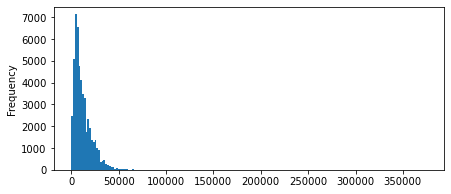

The distribution is skewed to the right
---------------------------------------
Statistics on: price
count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64
---------------------------------------
Suggested min border (5th percentile): 1950.0
Suggested max border (95th percentile): 30300.0
---------------------------------------
Suggested outliers are values below 1950.0 and above 30300.0
We have 5141  such values.
They stand for 9.98% of the population.
(* The borders & outliers we eventually choose may turn out to be more strict than the above suggestions).


Plotting a *car_age* histogram


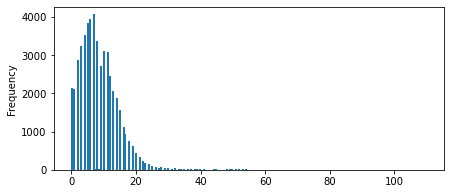

The distribution is skewed to the right
---------------------------------------
Statistics on: car_age
count    51525.000000
mean         8.513508
std          6.112895
min          0.000000
25%          4.000000
50%          7.500000
75%         12.000000
max        110.000000
Name: car_age, dtype: float64
---------------------------------------
Suggested min border (5th percentile): 1.0
Suggested max border (95th percentile): 19.0
---------------------------------------
Suggested outliers are values below 1.0 and above 19.0
We have 4222  such values.
They stand for 8.19% of the population.
(* The borders & outliers we eventually choose may turn out to be more strict than the above suggestions).


Plotting a *odometer* histogram


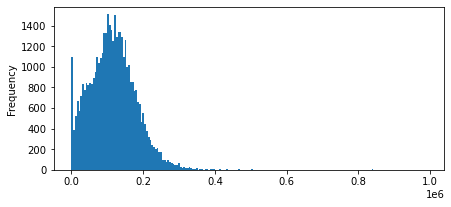

The distribution is skewed to the right
---------------------------------------
Statistics on: odometer
count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64
---------------------------------------
Suggested min border (5th percentile): nan
Suggested max border (95th percentile): nan
---------------------------------------
Suggested outliers are values below nan and above nan
We have 0  such values.
They stand for 0.00% of the population.
(* The borders & outliers we eventually choose may turn out to be more strict than the above suggestions).


Plotting a *cylinders* histogram


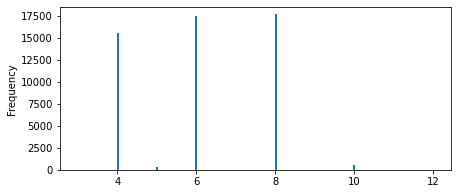

The distribution is skewed to the right
---------------------------------------
Statistics on: cylinders
count    51525.000000
mean         6.120058
std          1.657225
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64
---------------------------------------
Suggested min border (5th percentile): 4.0
Suggested max border (95th percentile): 8.0
---------------------------------------
Suggested outliers are values below 4.0 and above 8.0
We have 603  such values.
They stand for 1.17% of the population.
(* The borders & outliers we eventually choose may turn out to be more strict than the above suggestions).


Plotting a *condition_category* histogram


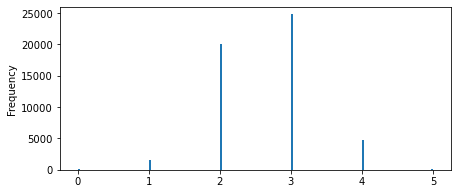

The distribution is skewed to the left
---------------------------------------
Statistics on: condition_category
count    51525.000000
mean         2.637535
std          0.712447
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition_category, dtype: float64
---------------------------------------
Suggested min border (5th percentile): 2.0
Suggested max border (95th percentile): 4.0
---------------------------------------
Suggested outliers are values below 2.0 and above 4.0
We have 1865  such values.
They stand for 3.62% of the population.
(* The borders & outliers we eventually choose may turn out to be more strict than the above suggestions).



In [51]:
# Presenting data for 5 core parameters:
for column in ['price', 'car_age', 'odometer', 'cylinders', 'condition_category']:
    outliers_func(column)

### - Checking Price - 

In [52]:
# Let's take a look at 'Price's statistics
cars['price'].describe()


count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

<AxesSubplot:title={'center':'Price distribution'}, ylabel='Frequency'>

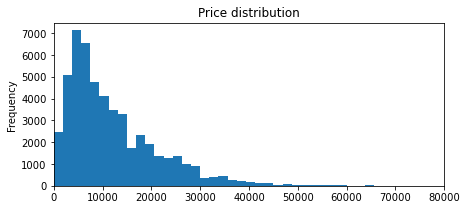

In [53]:
# Check 'Price' distibution using a histogram - I trimmed the upper outliers (xlim 0, 80000) 
cars['price'].plot(kind = 'hist', figsize = (7, 3), bins = 200, xlim = (0, 80000) , use_index = True, title = 'Price distribution')

**Insights:**
- Not that many observations above 50k. I shall treat anything above this price as outliers. 
- Low prices around 0 don't make sense. Shall treat these as outliers as well. **

In [54]:
# Checking how many observations of 'price' are above 50k - making sure the number is not substantial
cars.query('price > 50000')['price'].count() 

227

In [55]:
# 50k corresponds more or less with the 99.5th percentile
np.percentile(cars.price, 99.5)

49900.0

<AxesSubplot:title={'center':'Price distribution - lower tail'}, ylabel='Frequency'>

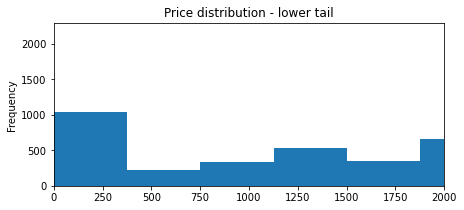

In [56]:
# Check the 'Price' histogram closer to 0 - let's see what can count as a reasonable lower bound
cars['price'].plot(kind = 'hist', figsize = (7, 3), bins = 1000, xlim = (0, 2000) , use_index = True, title = 'Price distribution - lower tail')

In [57]:
# How many observations with a very low price (<50) do we have:
cars.query('price < 50')['price'].count() 

822

In [58]:
# How many observations with 'price' blow 500 do we have
cars.query('price < 500')['price'].count() 

1069

In [59]:
# 500 corresponds to the 2.1 percentile
np.percentile(cars.price, 2.1)

500.0

**a price of 500 seems like a good lower bound.**

In [60]:
# Price outliers as percentage of the data
(1069 + 227) / len(cars)

0.025152838427947598

**We'll set our 'Price' range between (500, 50000). Anything below/above shall be treated as an outlier. Total 'Price' outliers (1296) stand for 2.5% of our data.**

### - Checking vehicle's age - 

In [61]:
# Let's check the vehicle's age when the ad was placed
cars['car_age'].describe()


count    51525.000000
mean         8.513508
std          6.112895
min          0.000000
25%          4.000000
50%          7.500000
75%         12.000000
max        110.000000
Name: car_age, dtype: float64

**While a car age of 0 years is possible (meaning the car is new), it is a bit suspicious. A good way to differ errors from real observations would be to check the price of such 'new' cars. If the price is high, it stands to reason we're facing a real value. If price is too low, then we're facing an error, either in 'price' or in 'age'.**

In [62]:
# Next, we should check how many completely new cars (car_age = 0) do we have, and does it make sense
# Query option:  cars.query('car_age == 0')['car_age'].count()   Where option:

cars['car_age'].where(cars['car_age'] == 0).count()


2152

In [63]:
# Changing 'car_age' type to float to allow calculations:
# cars['car_age'] = cars['car_age'].astype('float')

In [64]:
# Check 'Price' statistics for these '0 age' cars:
cars.query('car_age == 0')['price'].describe()

count     2152.000000
mean     24939.058086
std      15600.886816
min          1.000000
25%      15898.750000
50%      23795.000000
75%      35335.000000
max      90577.000000
Name: price, dtype: float64

**Any new car (age 0) with too low of a price must be (to a high level of certainty) an error. Shall trim the 1st quartile - observations where car_age == 0 and price is within the first quartile will be treated as errors.** 

In [65]:
# "new" cars fall within the 1st price quartile - these are our outliers
cars.query('car_age == 0 and price < 15898')['price'].count()

538

In [66]:
# Taking a look at a sample of the above price values
cars[(cars.car_age == 0) & (cars.price < 15898)]['price']


19       13990
365       6975
406        288
517      12495
1037     12500
         ...  
49079    14900
49212    11950
49721    15500
50337    12500
50839      475
Name: price, Length: 538, dtype: int64

In [67]:
# Setting the problematic car_age observations to negative values (-1). 
# As our lower bound is zero, they'll be trimmed off later when dealing with outliers
cars.loc[(cars.car_age == 0) & (cars.price < 15898), 'car_age'] = -1


In [68]:
# Making sure the car_age to 'NaN' transformation succeeded
cars.query('car_age == 0 and price < 15898')['price'].count()

0

**538 car_age observations were changed from 0 to -1. While it's ambiguous whether the error occurs under 'price'or under 'age', we cannot rely on these observations. As car_age lower bound is zero, they'll be trimmed when dealing with outliers during a later stage of the analysis.**

<AxesSubplot:title={'center':'Car Age Distribution'}, ylabel='Frequency'>

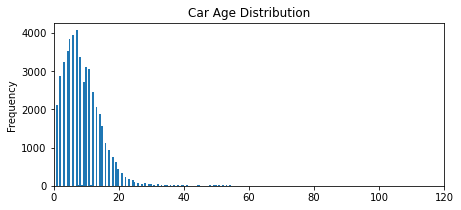

In [69]:
# Let's check the car_age distribution using a histogram
cars['car_age'].plot(kind = 'hist', figsize = (7, 3), bins = 200, xlim = (0, 120) , use_index = True, title = 'Car Age Distribution')

<AxesSubplot:title={'center':'Car Age Distribution'}, ylabel='Frequency'>

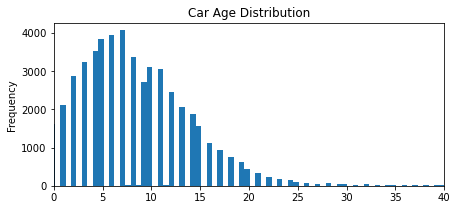

In [70]:
# A closer look
cars['car_age'].plot(kind = 'hist', figsize = (7, 3), bins = 200, xlim = (0, 40) , use_index = True, title = 'Car Age Distribution')

In [71]:
# Checking how many observations are above 25:
cars[(cars.car_age > 25)]['car_age'].count()

638

In [72]:
# percentage of observations above 25:
cars[(cars.car_age > 25)]['car_age'].count() / cars['car_age'].count()

0.012382338670548278

#### **Insight:**
 - **Only 638 observations above 25 (stand for 1.2% of the car_age population). They shall be treated as outliers.**

### - Checking Mileage - 

In [73]:
# Checking mileage statistics
cars['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

<AxesSubplot:title={'center':'Mileage distribution'}, ylabel='Frequency'>

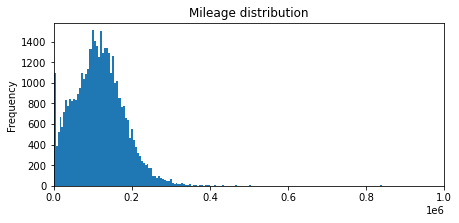

In [74]:
# Mileage distribution
cars['odometer'].plot(kind = 'hist', figsize = (7, 3), bins = 200, xlim = (0, 1000000) , use_index = True, title = 'Mileage distribution')

<AxesSubplot:title={'center':'Mileage distribution'}, ylabel='Frequency'>

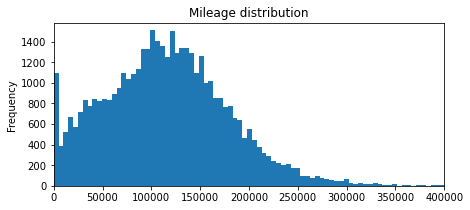

In [75]:
# A closer look
cars['odometer'].plot(kind = 'hist', figsize = (7, 3), bins = 200, xlim = (0, 400000) , use_index = True, title = 'Mileage distribution')

**Mileage Insigths:** 
- **There is a peak around 0 - better look into it in more detail.** 
- **Relatively small number of observations above 300000.** 
- **Would be interesting to check if cars with high mileage are also older. It would be highly unlikely to find a new car with extremely high mileage, and such anomalies might be interesting.** 

<AxesSubplot:title={'center':'Mileage distribution'}, ylabel='Frequency'>

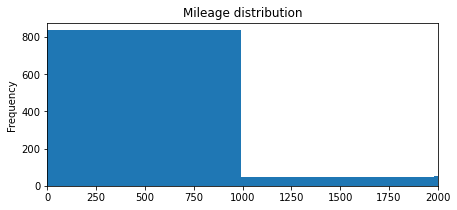

In [76]:
# A closer look on the left tail - x axis range (0, 2000)
cars['odometer'].plot(kind = 'hist', figsize = (7, 3), bins = 1000, xlim = (0, 2000) , use_index = True, title = 'Mileage distribution')

In [78]:
# Number of cars with less than 1000 miles on thier clock
cars.query('odometer < 1000')['odometer'].count()

838

In [79]:
# % of cars with less than 1000 miles on thier clock
cars.query('odometer < 1000')['odometer'].count() / cars.odometer.count()

0.01920564710196411

There are 838 cars with less than 1000 miles on their clock. 
Since these form a suspicious peak in our mileage histogram, a question arises: 
does it make sense that we have that many entries with under 1000 miles? 
How can we tell if these are errors or not?

I assume a positive link between mileage and the car's age. It stands to reason that the older the car, the higher the mileage. Specifically, cars with near zero mileage should mostly be brand new. Looking at it from the other direction: if a car's age is older than 1, and according to our list it hadn't moved at all - there's a high likelihood such cases are due to errors in the data.


In [80]:
# Number of cars with car_age older or equals to 1, and less than 1000 miles on their clocks
cars.query('odometer < 1000 and car_age >= 1')['odometer'].count()

765

Checking mileage versus car_age, we find 765 entries (out of the 838) are in a higher likelihood of a mistake. 

**Though we can't tell for sure where the mistake is (under car_age or under odometer), the histogram shape hints that at least
some of these odometer entries are wrong. Checking versus the car_age column reinforces the suspicioun. To the very least, 
we can now feel more comfortable treating entries under 1000 miles as outliers.** 


(*Adding a remark here: Fine tunning could have been done further, i.e. checking the mileage under 750, 200, etc. But according to the graph, and since 838 enteries stand for less than 2% of the data, 1000 seems a good enough lower bar). 

In [81]:
# Checking the right tail: number of cars with high mileage (odometer > 300,000)
cars.query('odometer > 300000')['odometer'].count()

287

In [82]:
# Checking whether high mileage cars are old or not (odometer > 300,000 and age >= 10 years)
cars.query('odometer > 300000 and car_age >= 10')['odometer'].count()

239

In [83]:
# Checking how many high mileage cars are also "new", a.k.a less than 10 years old
cars.query('odometer > 300000 and car_age < 10')['odometer'].count()

48

In [84]:
# Taking a look at the few unusual cars (high mileage and young age)
cars.query('odometer > 300000 and car_age < 10').sort_values(by = 'average_mileage_per_year', ascending = False).head(8)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted_numeric,day_posted,car_age,average_mileage_per_year,condition_category
4970,29000,2018.0,chevrolet silverado 1500,excellent,8,gas,373200.0,automatic,truck,other,1.0,2018-09-14,40,2018,9,4,Friday,0.0,inf,3
9742,12500,2018.0,nissan altima,like new,4,gas,320000.0,automatic,sedan,silver,0.0,2018-08-14,75,2018,8,1,Tuesday,-1.0,inf,4
13027,8500,2015.0,chevrolet malibu,excellent,4,gas,838095.0,automatic,sedan,silver,0.0,2018-05-30,10,2018,5,2,Wednesday,3.0,2.793650e+05,3
5735,7500,2015.0,hyundai elantra,excellent,4,gas,813542.0,other,coupe,brown,0.0,2018-11-21,5,2018,11,2,Wednesday,3.0,2.711807e+05,3
48962,40000,2014.0,ram 3500,excellent,8,diesel,980000.0,automatic,truck,white,1.0,2018-12-06,7,2018,12,3,Thursday,4.0,2.450000e+05,3
2840,18500,2014.0,ford explorer,excellent,6,gas,866000.0,automatic,SUV,black,1.0,2018-07-20,14,2018,7,4,Friday,4.0,2.165000e+05,3
33578,12995,2014.0,chrysler 300,like new,6,gas,811956.0,automatic,sedan,other,0.0,2018-11-13,44,2018,11,1,Tuesday,4.0,2.029890e+05,4
40729,4700,2013.0,chevrolet cruze,good,6,gas,990000.0,automatic,sedan,black,0.0,2018-05-02,4,2018,5,2,Wednesday,5.0,1.980000e+05,2


Any young car with an average mileage-per-year exceeding 80,000 is extremely likely to have a mistake either with its odometer, or its model_year and car_age. (*for a length refernece, Earth's circumference equals 24,859 miles). 

- **287 cars have high mileage on their clock - about 0.6% of the population.** 
    - 239 of them have an age equals to or older than 10 years - so their high odometer values can be explained by their long time on the road.
    - 47 are relatively new (car_age < 10 years). Out of these, at least 17 have errors in their data (probably a human input error).
    - The rest are NaNs.


**Bottom line: we can feel comfortable enough treating any odometer values exceeding 300,000 as outliers.**


### - Checking Number of Cylinders - 

In [85]:
# Checking cylinders statistics
cars['cylinders'].describe()

count    51525.000000
mean         6.120058
std          1.657225
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

In [86]:
# Cylinders distribution
cars['cylinders'].value_counts()

8     17638
6     17464
4     15480
10      565
5       323
3        34
7        17
9         2
12        2
Name: cylinders, dtype: int64

<AxesSubplot:title={'center':'Cylinders distribution'}, ylabel='Frequency'>

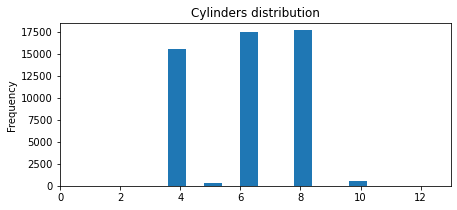

In [87]:
# Cylinders distribution
cars['cylinders'].plot(kind = 'hist', figsize = (7, 3), bins = 15, xlim = (0, 13) , use_index = True, title = 'Cylinders distribution')

<AxesSubplot:title={'center':'Cylinders distribution'}, ylabel='cylinders'>

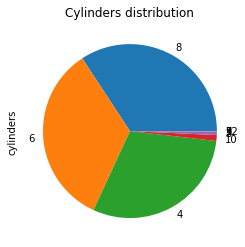

In [88]:
# Cylinders distribution
cars['cylinders'].value_counts().plot(kind = 'pie', title = 'Cylinders distribution')

**Though 3 and 12 can be treated as outliers, there's no reason at the moment to cut them off. We'll just keep in mind that there're not enough observations to draw conclusions regarding 12 cylinders and 3 cylinders.** 

### - Checking Vehicle's Condition - 

In [89]:
# Checking Condition statistics
cars['condition'].value_counts()


excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

<AxesSubplot:title={'center':'Condition distribution'}>

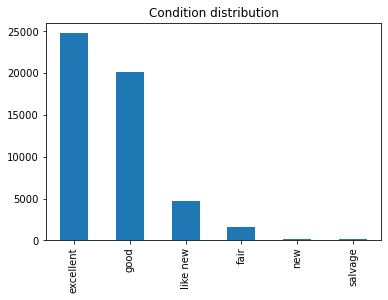

In [90]:
# Condition distribution
cars['condition'].value_counts().plot(kind = 'bar', title = 'Condition distribution')


<AxesSubplot:title={'center':'Condition distribution'}, ylabel='condition'>

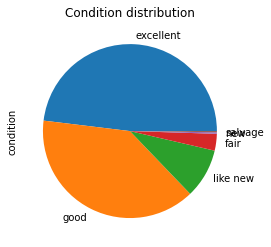

In [91]:
# Condition distribution
cars['condition'].value_counts().plot(kind = 'pie', title = 'Condition distribution')


**Everything seems normal here.**

### Intermediate conclusions:

- Price, Car Age, and Mileage have positive right skewed distributions.

**Price insights**
- We'll set our 'Price' range between (500, 50000). Anything below/above shall be treated as an outlier. Total 'Price' outliers (1296) stand for 2.5% of our data.

**Car age insights**
- car_age lower bound: While a car age of 0 years is possible (meaning the car is new), some of the car_age values were wrong: new cars, to a high level of certainty, are not sold for cheap.  Using low 'Price' as indicator, I trimmed 538 erroneous car_age values, changing them from 0 to NaN.car_age lower bound remained at zero 0.
- car_age upper bound: was set to 25. There are only 638 observations (outliers) above 25 years, and they stand for 1.2% of the car_age population. 

**Mileage  Insigths** 
- The mileage distribution consisted of too many observations around 0 (a suspicious looking peak). 
- Based on the histogram shape and a mileage versus car_age analysis, 838 entries under 1000 miles were set as outliers (less than 2% of the population). 
- 287 cars with more than 300,000 miles on their clocks were set as outliers as well (roughly 0.6% of the population).

**Cylinders Insigths** 
- There're not enough observations to draw conclusions regarding 12-cylinder-cars and 3-cylinder-cars.


**Condition Insigths** 
- No outliers, everything seems normal. 

## Study and treat outliers


**Upper and lower limits for outliers:**
- Price: (500,  50,000)
- Car Age: (0, 25)
- Mileage (Odometer): (1000, 300,000)


In [94]:
# Create a copy of the dataframe
cars_clean = cars.copy()

In [95]:
# Store data without outliers in a separate DataFrame

cars_clean = cars.query(' price >= 500 & price <= 50000 & car_age >= 0 & car_age <= 25 & 1000 <= odometer & odometer <= 300000 ')
cars_clean.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted_numeric,day_posted,car_age,average_mileage_per_year,condition_category
0,9400,2011.0,bmw x5,good,6,gas,145000.0,automatic,SUV,other,1.0,2018-06-23,19,2018,6,5,Saturday,7.0,20714.285714,2
1,25500,2011.0,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2018,10,4,Friday,7.0,12672.142857,2
2,5500,2013.0,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2019,2,3,Thursday,6.0,18333.333333,4
4,14900,2017.0,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2019,4,1,Tuesday,2.0,40451.500000,3
5,14990,2014.0,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,2018,6,2,Wednesday,4.0,14488.500000,3


In [96]:
# Checking limits
for param in ['price', 'car_age', 'odometer']:
    print(f'{param} max is:', cars_clean[param].max())
    print(f'{param} min is:', cars_clean[param].min())
    print()

price max is: 50000
price min is: 500

car_age max is: 25.0
car_age min is: 0.0

odometer max is: 300000.0
odometer min is: 1000.0



In [97]:
cars_clean.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,year_posted,month_posted,day_posted_numeric,car_age,average_mileage_per_year,condition_category
count,40795.000000,40795.000000,40795.000000,40795.000000,40795.000000,40795.000000,40795.000000,40795.000000,40795.000000,40795.000000,40795.0000,40795.000000
mean,12255.556245,2010.032112,6.089987,118119.401863,0.497144,39.631646,2018.307905,6.630494,3.000539,8.275794,inf,2.630935
std,9008.137678,5.098631,1.631346,58483.205162,0.499998,28.177125,0.461633,3.470253,1.995791,5.108620,NaN,0.704056
min,500.000000,1993.000000,3.000000,1000.000000,0.000000,0.000000,2018.000000,1.000000,0.000000,0.000000,81.2500,0.000000
25%,5495.000000,2007.000000,4.000000,76000.000000,0.000000,19.000000,2018.000000,3.000000,1.000000,4.000000,11065.4375,2.000000
50%,9500.000000,2011.000000,6.000000,116000.000000,0.000000,33.000000,2018.000000,7.000000,3.000000,8.000000,15437.5000,3.000000
75%,16995.000000,2014.000000,8.000000,156000.000000,1.000000,53.000000,2019.000000,10.000000,5.000000,12.000000,22250.0000,3.000000
max,50000.000000,2019.000000,12.000000,300000.000000,1.000000,271.000000,2019.000000,12.000000,6.000000,25.000000,inf,5.000000


## Study core parameters without outliers

In [98]:
# Setting a function to calculate limits and outliers both for the clean and the original data

def outliers_func2(column):
    # Treating original data
    print()    
    print('Plotting *{}* original histogram'.format(column))
    cars[column].plot(kind = 'hist', figsize = (7, 3), bins = 150 , use_index = True)
    matplotlib.pyplot.show()
    
    if cars[column].mean() > cars[column].median():
        print('The distribution is skewed to the right')
    elif cars[column].mean() == cars[column].median():
        print('This is a normal distribution') 
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format(column))
    print(cars[column].describe())
    ninety_five = np.percentile(cars[column], 95)
    five = np.percentile(cars[column], 5)
    print('---------------------------------------')
    print('Suggested min border (5th percentile):',five)
    print('Suggested max border (95th percentile):',ninety_five)
    print('---------------------------------------')
    print('Suggested outliers are values below',five, "and above",ninety_five)
    print('We have',len(cars[(cars[column]<five)|(cars[column]>ninety_five)])," such values.")
    print('They stand for {:.2%} of the population.'.format(len(cars[(cars[column]<five)|(cars[column]>ninety_five)]) / len(cars[column]) )    )
    print('(* The borders & outliers we eventually choose may turn out to be more strict than the above suggestions).')
    print()
    print()
    
    # Treating new data without outliers
    print('Plotting *{}* new histogram without outliers'.format(column))
    cars_clean[column].plot(kind = 'hist', figsize = (7, 3), bins = 100 , use_index = True)
    matplotlib.pyplot.show()
    
    if cars_clean[column].mean() > cars_clean[column].median():
        print('The new distribution is skewed to the right')
    elif cars_clean[column].mean() == cars_clean[column].median():
        print('The new distribution is a normal distribution') 
    else:
        print('The new distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format(column))
    print(cars_clean[column].describe())
    ninety_five = np.percentile(cars_clean[column], 95)
    five = np.percentile(cars_clean[column], 5)
    print('---------------------------------------')
    print('5th percentile:',five)
    print('95th percentile:',ninety_five)
    print('---------------------------------------')
    print()



Plotting *price* original histogram


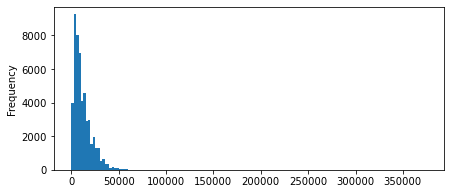

The distribution is skewed to the right
---------------------------------------
Statistics on: price
count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64
---------------------------------------
Suggested min border (5th percentile): 1950.0
Suggested max border (95th percentile): 30300.0
---------------------------------------
Suggested outliers are values below 1950.0 and above 30300.0
We have 5141  such values.
They stand for 9.98% of the population.
(* The borders & outliers we eventually choose may turn out to be more strict than the above suggestions).


Plotting *price* new histogram without outliers


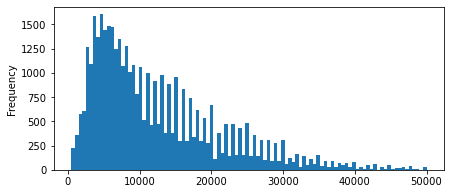

The new distribution is skewed to the right
---------------------------------------
Statistics on: price
count    40795.000000
mean     12255.556245
std       9008.137678
min        500.000000
25%       5495.000000
50%       9500.000000
75%      16995.000000
max      50000.000000
Name: price, dtype: float64
---------------------------------------
5th percentile: 2500.0
95th percentile: 29995.0
---------------------------------------


Plotting *car_age* original histogram


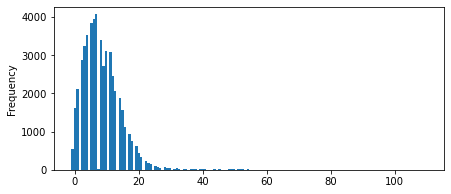

The distribution is skewed to the right
---------------------------------------
Statistics on: car_age
count    51525.000000
mean         8.503066
std          6.128264
min         -1.000000
25%          4.000000
50%          7.500000
75%         12.000000
max        110.000000
Name: car_age, dtype: float64
---------------------------------------
Suggested min border (5th percentile): 1.0
Suggested max border (95th percentile): 19.0
---------------------------------------
Suggested outliers are values below 1.0 and above 19.0
We have 4222  such values.
They stand for 8.19% of the population.
(* The borders & outliers we eventually choose may turn out to be more strict than the above suggestions).


Plotting *car_age* new histogram without outliers


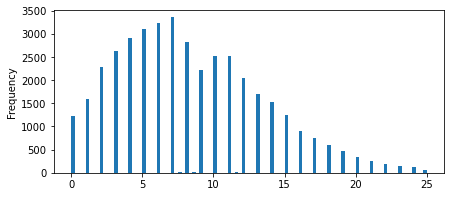

The new distribution is skewed to the right
---------------------------------------
Statistics on: car_age
count    40795.000000
mean         8.275794
std          5.108620
min          0.000000
25%          4.000000
50%          8.000000
75%         12.000000
max         25.000000
Name: car_age, dtype: float64
---------------------------------------
5th percentile: 1.0
95th percentile: 18.0
---------------------------------------


Plotting *odometer* original histogram


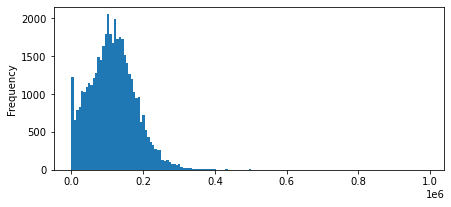

The distribution is skewed to the right
---------------------------------------
Statistics on: odometer
count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64
---------------------------------------
Suggested min border (5th percentile): nan
Suggested max border (95th percentile): nan
---------------------------------------
Suggested outliers are values below nan and above nan
We have 0  such values.
They stand for 0.00% of the population.
(* The borders & outliers we eventually choose may turn out to be more strict than the above suggestions).


Plotting *odometer* new histogram without outliers


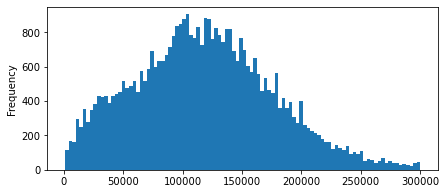

The new distribution is skewed to the right
---------------------------------------
Statistics on: odometer
count     40795.000000
mean     118119.401863
std       58483.205162
min        1000.000000
25%       76000.000000
50%      116000.000000
75%      156000.000000
max      300000.000000
Name: odometer, dtype: float64
---------------------------------------
5th percentile: 25261.7
95th percentile: 220000.0
---------------------------------------


Plotting *cylinders* original histogram


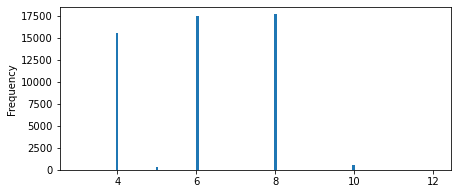

The distribution is skewed to the right
---------------------------------------
Statistics on: cylinders
count    51525.000000
mean         6.120058
std          1.657225
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64
---------------------------------------
Suggested min border (5th percentile): 4.0
Suggested max border (95th percentile): 8.0
---------------------------------------
Suggested outliers are values below 4.0 and above 8.0
We have 603  such values.
They stand for 1.17% of the population.
(* The borders & outliers we eventually choose may turn out to be more strict than the above suggestions).


Plotting *cylinders* new histogram without outliers


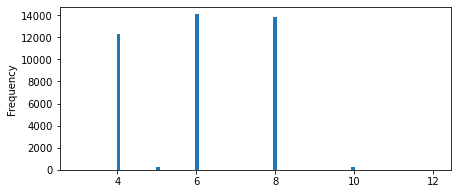

The new distribution is skewed to the right
---------------------------------------
Statistics on: cylinders
count    40795.000000
mean         6.089987
std          1.631346
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64
---------------------------------------
5th percentile: 4.0
95th percentile: 8.0
---------------------------------------


Plotting *condition_category* original histogram


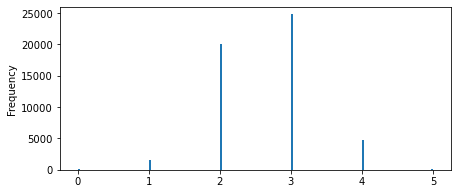

The distribution is skewed to the left
---------------------------------------
Statistics on: condition_category
count    51525.000000
mean         2.637535
std          0.712447
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition_category, dtype: float64
---------------------------------------
Suggested min border (5th percentile): 2.0
Suggested max border (95th percentile): 4.0
---------------------------------------
Suggested outliers are values below 2.0 and above 4.0
We have 1865  such values.
They stand for 3.62% of the population.
(* The borders & outliers we eventually choose may turn out to be more strict than the above suggestions).


Plotting *condition_category* new histogram without outliers


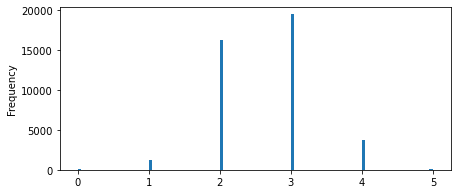

The new distribution is skewed to the left
---------------------------------------
Statistics on: condition_category
count    40795.000000
mean         2.630935
std          0.704056
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition_category, dtype: float64
---------------------------------------
5th percentile: 2.0
95th percentile: 4.0
---------------------------------------



In [99]:
# Presenting data for 5 core parameters:
for column in ['price', 'car_age', 'odometer', 'cylinders', 'condition_category']:
    outliers_func2(column)

Everything looks much better now.

## Ads lifetime


In [100]:
# a Function to find IQR and lower / upper whisker values

def box_outliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
 
    print("IQR value for column %s is: %s" % (col, IQR))

    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    
    if lower_range < 0 :
        print('lower whisker is 0')
    else:
        print('lower whisker is', lower_range)
    print('upper whisker is', upper_range)


days_listed stats:

count    40795.000000
mean        39.631646
std         28.177125
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

days_listed mean: 39.6
days_listed median: 33.0

AxesSubplot(0.125,0.125;0.775x0.755)


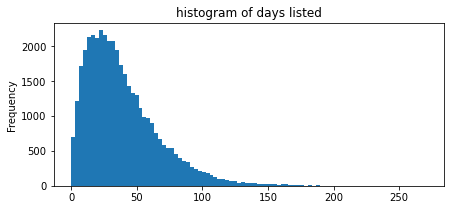

The distribution is skewed to the right

AxesSubplot(0.125,0.125;0.775x0.755)


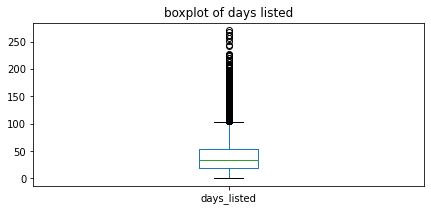

In [101]:
# days_listed stats:
print()
print('days_listed stats:')
print()

print(cars_clean['days_listed'].describe())
print()

print( 'days_listed mean: {:.1f}'.format(cars_clean['days_listed'].mean()) )
print( 'days_listed median: {:.1f}'.format(cars_clean['days_listed'].median()) ) 
print()

print(cars_clean['days_listed'].plot(kind = 'hist', figsize = (7, 3), bins = 90 , use_index = True, title = 'histogram of days listed'))
matplotlib.pyplot.show()

if cars_clean['days_listed'].mean() > cars_clean['days_listed'].median():
    print('The distribution is skewed to the right')
elif cars_clean['days_listed'].mean() == cars_clean['days_listed'].median():
    print('This is a normal distribution') 
else:
    print('The distribution is skewed to the left')

print()

print(cars_clean['days_listed'].plot(kind = 'box', figsize = (7, 3), use_index = True, title = 'boxplot of days listed'))


<AxesSubplot:xlabel='days_listed'>

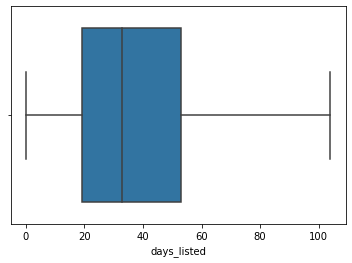

In [102]:
# days_listed Boxplot
sns.boxplot(x="days_listed", data=cars_clean, showfliers = False)

In [103]:
# days_listed IQR and whiskers: 
box_outliers(cars_clean, 'days_listed')

IQR value for column days_listed is: 34.0
lower whisker is 0
upper whisker is 104.0


75% of the ads are listed for 53 days or less. 

Let's check the medians of the listing periods per car-type and model-year:

<AxesSubplot:title={'center':'Ads - listed number of days'}, xlabel='model,model_year'>

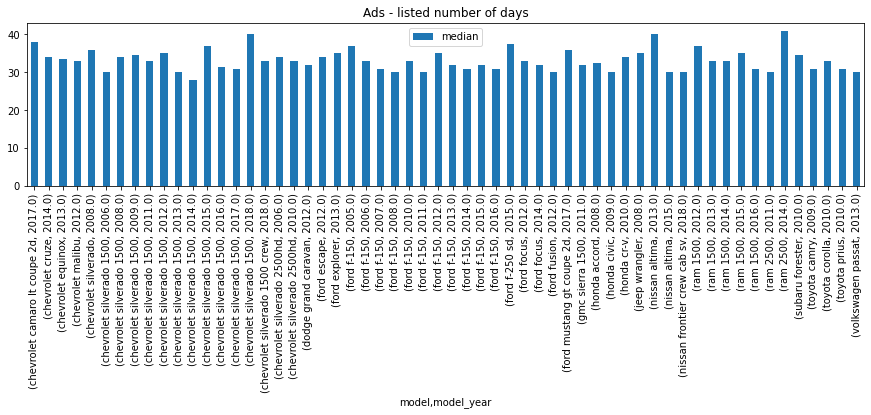

In [104]:
# Medians of days_listed, per model and model_year
# (showing only groups bigger than 80 observations)
p = cars_clean.groupby(['model', 'model_year'])['days_listed'].agg(['count', 'median'])
p.query('count > 80').sort_values(by = ['model', 'model_year']).plot(kind = 'bar', y = 'median',  figsize = (15, 3), title = 'Ads - listed number of days')

Interestingly enough, time medians seem to fluctuate among and within model groups, and we do not detect any visible trends.

Now let's check which other parameters influence the number of days ads appear on the website: 

In [105]:
# Correlation table of the clean data - we focus on days_listed 
cars_clean.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,year_posted,month_posted,day_posted_numeric,car_age,average_mileage_per_year,condition_category
price,1.000000,0.575010,0.355987,-0.543777,0.373072,-0.000546,0.007906,-0.011296,-0.000900,-0.573171,0.234018,0.237753
model_year,0.575010,1.000000,-0.142731,-0.601615,0.008469,-0.001606,0.023612,-0.023764,-0.003266,-0.995911,0.528097,0.273786
cylinders,0.355987,-0.142731,1.000000,0.112464,0.406077,0.004779,-0.007660,0.007454,-0.000474,0.141759,-0.037787,-0.073892
odometer,-0.543777,-0.601615,0.112464,1.000000,0.039367,0.003745,-0.015439,0.019919,0.001802,0.599043,0.078016,-0.295123
is_4wd,0.373072,0.008469,0.406077,0.039367,1.000000,0.004673,-0.002085,0.004012,0.003072,-0.008641,0.043149,0.014136
days_listed,-0.000546,-0.001606,0.004779,0.003745,0.004673,1.000000,0.008507,-0.010994,0.003221,0.002371,-0.002478,-0.001328
year_posted,0.007906,0.023612,-0.007660,-0.015439,-0.002085,0.008507,1.000000,-0.818372,-0.008801,0.066798,-0.124458,0.007378
month_posted,-0.011296,-0.023764,0.007454,0.019919,0.004012,-0.010994,-0.818372,1.000000,0.005536,-0.050234,0.104556,-0.007568
day_posted_numeric,-0.000900,-0.003266,-0.000474,0.001802,0.003072,0.003221,-0.008801,0.005536,1.000000,0.002464,-0.005483,-0.001010
car_age,-0.573171,-0.995911,0.141759,0.599043,-0.008641,0.002371,0.066798,-0.050234,0.002464,1.000000,-0.539209,-0.272584


In [106]:
# Correlation table of entries with short ad lifespan (<=10 days)
n = cars_clean.query('days_listed <= 10')
print('There are', n['days_listed'].count(), 'Ads with a lifespan shorter or equal to 10 days.')
print('They stand for {:.2%} of the population'.format(n['days_listed'].count() / cars_clean['days_listed'].count()), 'and this is their correlation table:' )
n.corr()

There are 4245 Ads with a lifespan shorter or equal to 10 days.
They stand for 10.41% of the population and this is their correlation table:


,price,model_year,cylinders,odometer,is_4wd,days_listed,year_posted,month_posted,day_posted_numeric,car_age,average_mileage_per_year,condition_category
price,1.000000,0.571050,0.345546,-0.552824,0.359554,-0.016282,0.022120,-0.020590,0.018258,-0.568275,0.216740,0.262421
model_year,0.571050,1.000000,-0.150623,-0.607247,-0.016294,-0.013649,0.030176,-0.029759,0.000219,-0.995914,0.536371,0.283448
cylinders,0.345546,-0.150623,1.000000,0.117648,0.400504,-0.006473,-0.010074,0.006612,-0.011524,0.149508,-0.056555,-0.090069
odometer,-0.552824,-0.607247,0.117648,1.000000,0.050357,0.010172,-0.008404,0.011921,0.003389,0.605662,0.089332,-0.321659
is_4wd,0.359554,-0.016294,0.400504,0.050357,1.000000,-0.019355,0.006539,-0.013853,0.013739,0.016862,0.026144,0.021478
days_listed,-0.016282,-0.013649,-0.006473,0.010172,-0.019355,1.000000,-0.001803,-0.010362,0.022370,0.013468,-0.010933,-0.020385
year_posted,0.022120,0.030176,-0.010074,-0.008404,0.006539,-0.001803,1.000000,-0.818803,-0.019951,0.060216,-0.103225,0.027667
month_posted,-0.020590,-0.029759,0.006612,0.011921,-0.013853,-0.010362,-0.818803,1.000000,0.024608,-0.044261,0.094432,-0.013618
day_posted_numeric,0.018258,0.000219,-0.011524,0.003389,0.013739,0.022370,-0.019951,0.024608,1.000000,-0.002021,0.002571,-0.000170
car_age,-0.568275,-0.995914,0.149508,0.605662,0.016862,0.013468,0.060216,-0.044261,-0.002021,1.000000,-0.546119,-0.280563


In [107]:
# Correlation table of entries with long ad lifespan (>=53 days, 4th days_listed quartile)
n = cars_clean.query('days_listed >= 53')
n.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,year_posted,month_posted,day_posted_numeric,car_age,average_mileage_per_year,condition_category
price,1.000000,0.568618,0.361568,-0.533053,0.376204,-0.005630,0.006274,-0.004893,0.002094,-0.567148,0.239794,0.230772
model_year,0.568618,1.000000,-0.138226,-0.594544,-0.002249,0.003728,0.028616,-0.019850,-0.011185,-0.995806,0.528356,0.281932
cylinders,0.361568,-0.138226,1.000000,0.115737,0.410812,0.005039,0.004028,-0.007048,-0.007575,0.138377,-0.021282,-0.070795
odometer,-0.533053,-0.594544,0.115737,1.000000,0.049412,0.009070,-0.014109,0.023339,-0.006658,0.592316,0.087173,-0.294997
is_4wd,0.376204,-0.002249,0.410812,0.049412,1.000000,-0.009398,0.008688,-0.005451,0.014092,0.003041,0.047894,0.020437
days_listed,-0.005630,0.003728,0.005039,0.009070,-0.009398,1.000000,0.018127,-0.011688,0.001100,-0.002063,0.004077,0.000959
year_posted,0.006274,0.028616,0.004028,-0.014109,0.008688,0.018127,1.000000,-0.817914,0.001080,0.062961,-0.128876,-0.002989
month_posted,-0.004893,-0.019850,-0.007048,0.023339,-0.005451,-0.011688,-0.817914,1.000000,-0.002775,-0.055046,0.112685,0.001421
day_posted_numeric,0.002094,-0.011185,-0.007575,-0.006658,0.014092,0.001100,0.001080,-0.002775,1.000000,0.011267,-0.023868,-0.001690
car_age,-0.567148,-0.995806,0.138377,0.592316,0.003041,-0.002063,0.062961,-0.055046,0.011267,1.000000,-0.540099,-0.281761


Surprisingly enough, it seems days_listed is not correlated with - and hence not effected by - any of the other parameters. 
The weak-to-non-existent correlation remains, even when checking only Ads with short or long lifespans. 

## Average price per each type of vehicle

In [108]:
# Checking vehicle type versus number of ads and average price, sorted by average price:
# (Grouping days_listed and price by model, chekcing for number of entries and means, sorted by average price)
ad_num_avg_price_per_model = cars_clean.groupby(['model'])['days_listed', 'price'].agg(
    ['count','mean']).sort_values(
    by = ('price', 'mean'), ascending = False).reset_index()

ad_num_avg_price_per_model.head()


model days_listed            price              
                                       count       mean count          mean
0  chevrolet silverado 1500 crew         261  38.118774   261  29290.996169
1                       ram 3500         316  40.712025   316  25367.180380
2       ford mustang gt coupe 2d         250  38.112000   250  25079.796000
3    ford f150 supercrew cab xlt         272  41.084559   272  24786.665441
4     chevrolet silverado 3500hd         194  37.711340   194  24632.386598

The cars with the highest average prices are chevrolet silverado 1500 crew, ram 3500, and ford mustang gt coupe 2d. Their avg. prices range from ~25000 to ~29300. Relatively low number of ads were posted for these cars (250 - 316), and they were listed for average time periods of roughly 40 days.  

In [109]:
# Checking vehicle type versus number of ads and average price, sorted by number of ads:

# (Grouping days_listed and price by model, chekcing for number of entries and means sorted by number of ads (days_listed, count) )
ad_num_avg_price_per_model = cars_clean.groupby(['model'])['days_listed', 'price'].agg(
    ['count','mean']).sort_values(
    by = ('days_listed', 'count'), ascending = False).reset_index()

ad_num_avg_price_per_model


model days_listed            price              
                                   count       mean count          mean
0                 ford f-150        2233  38.946261  2233  14174.712047
1   chevrolet silverado 1500        1766  38.889015  1766  15779.590034
2                   ram 1500        1405  39.560142  1405  14744.930249
3        chevrolet silverado         994  41.358149   994  14711.196177
4                   ram 2500         831  40.821901   831  21985.913357
..                       ...         ...        ...   ...           ...
94              chrysler 200         191  40.968586   191   7747.628272
95      ford f350 super duty         191  41.790576   191  15603.497382
96     ford f-250 super duty         190  41.084211   190  18789.000000
97                 ford f350         186  38.397849   186  19200.720430
98               kia sorento         184  42.750000   184  10081.027174

[99 rows x 5 columns]

<AxesSubplot:xlabel='count', ylabel='model'>

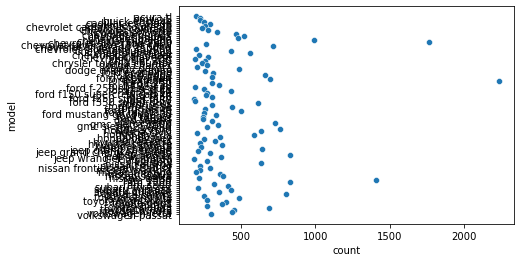

In [130]:
# Drawing a scatterplot- number of ads Vs vehicle type

num_ads_vs_model = cars_clean.groupby(['model'])['days_listed'].agg(['count']).reset_index()

sns.scatterplot(data=num_ads_vs_model, x="count", y="model")

# For a more detailed plot may use the following code (works locally, not on platform):
#num_ads_vs_model.plot(kind = 'scatter', 
#                      x = "count", y = "model", 
#                      figsize = (10, 30),  
#                      title = 'number of ads Vs vehicle type', 
#                      xlabel = 'number of ads', ylabel = 'model')

In [111]:
# The 2 models with greatest number of ads
ad_num_avg_price_per_model[:2]

model days_listed            price              
                                  count       mean count          mean
0                ford f-150        2233  38.946261  2233  14174.712047
1  chevrolet silverado 1500        1766  38.889015  1766  15779.590034

## Price factors

In [112]:
# listing the top 3 models (in terms of number of ads)
top3_list = list(ad_num_avg_price_per_model.head(3)['model'])
top3_list

['ford f-150', 'chevrolet silverado 1500', 'ram 1500']

### Next we check the price dependencies for the ford f-150 model

*Correlation table & scatter plots*

                       price   car_age  odometer  condition_category
price               1.000000 -0.769919 -0.703528            0.418021
car_age            -0.769919  1.000000  0.564136           -0.396503
odometer           -0.703528  0.564136  1.000000           -0.358986
condition_category  0.418021 -0.396503 -0.358986            1.000000


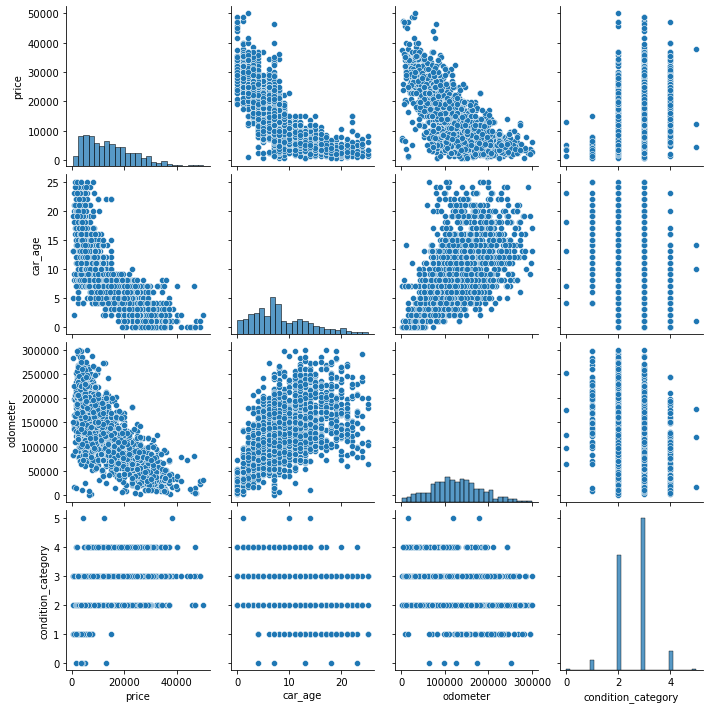

In [113]:
# Checking Price, Mileage, and Condition effects on ford f-150: 

ford_f150_data = cars_clean[(cars_clean.model == 'ford f-150')]
#ford_f150_data
for_scatter=ford_f150_data[['price', 'car_age', 'odometer','condition_category']]

print('*Correlation table & scatter plots*')
print()
print(sns.pairplot(for_scatter))
print(for_scatter.corr())

We see a strong negative correlation between price and age (-0.77) and between price and mileage (-0.7), and a medium possitive correlation (0.42) between price and condition, for the ford f-150 model. 

In [114]:
# Checking categorical values
##Making sure that we have more than 50 listings per sub category

print(ford_f150_data['transmission'].value_counts())
print()
print(ford_f150_data['paint_color'].value_counts() )


automatic    2179
manual         49
other           5
Name: transmission, dtype: int64

white     600
other     392
black     301
red       286
silver    171
blue      167
grey      160
green      56
brown      48
custom     46
yellow      4
purple      1
orange      1
Name: paint_color, dtype: int64


In [115]:
# Filtering values, keeping only those above 50
ford_transmission_above_50 = ford_f150_data.query('transmission == "automatic"')
ford_color_above_50 = ford_f150_data.query('paint_color != ["other", "orange", "yellow", "purple", "custom", "brown"]') 

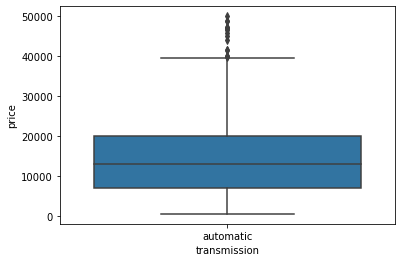

In [116]:
# Transmission boxplot
ax=sns.boxplot(x="transmission", y="price", data=ford_transmission_above_50)

We cannot compare different transmission types due to lack of observations.

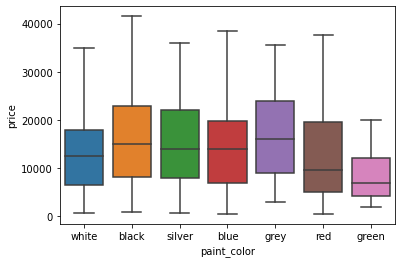

In [117]:
# Color boxplot
ax=sns.boxplot(x="paint_color", y="price", data=ford_color_above_50, showfliers = False)

It seems price is not heavily effected by color. Grey cars are a little bit more expensive than the others. The green boxplot looks different, but that's probably due to the small number of observations (56) compared to the rest. 

### Next we check the price dependencies for the Chevrolet Silverado 1500 model

*Correlation table & scatter plots*

                       price   car_age  odometer  condition_category
price               1.000000 -0.791911 -0.786581            0.355868
car_age            -0.791911  1.000000  0.644493           -0.310757
odometer           -0.786581  0.644493  1.000000           -0.351587
condition_category  0.355868 -0.310757 -0.351587            1.000000


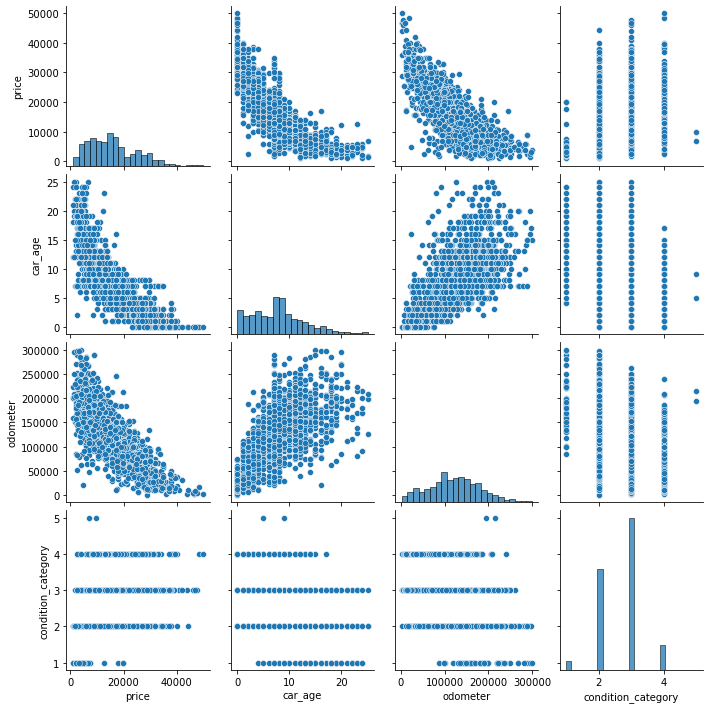

In [118]:
# Checking Price, Mileage, and Condition effects on Chevrolet Silverado 1500: 

Chev_Silver1500 = cars_clean[(cars_clean.model == 'chevrolet silverado 1500')]
for_scatter_chev=Chev_Silver1500[['price', 'car_age', 'odometer','condition_category']]

print('*Correlation table & scatter plots*')
print()
print(sns.pairplot(for_scatter_chev))
print(for_scatter_chev.corr())

We see a strong negative correlation between car age and price (-0.79), and between price and mileage (-0.78); and a medium possitive correlation (0.35) between price and condition, for the Chevrolet Silverado 1500 model. 

In [119]:
# Checking categorical values
##Making sure that we have more than 50 listings per sub category

print(Chev_Silver1500['transmission'].value_counts())
print()
print(Chev_Silver1500['paint_color'].value_counts() )


automatic    1749
manual         14
other           3
Name: transmission, dtype: int64

white     425
other     313
black     256
red       178
grey      162
silver    162
blue      154
custom     41
green      34
brown      32
yellow      4
purple      3
orange      2
Name: paint_color, dtype: int64


In [120]:
# Filtering values, keeping only those above 50
Chev_Silver1500_transmission_above_50 = Chev_Silver1500.query('transmission == "automatic"')
Chev_Silver1500_color_above_50 = Chev_Silver1500.query('paint_color != ["other", "orange", "purple", "yellow", "brown", "green", "custom"]') 

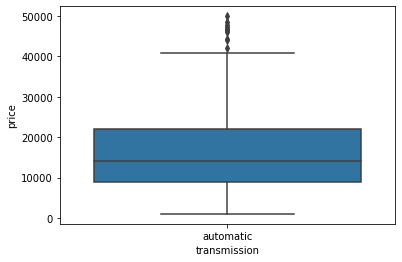

In [121]:
# Transmission boxplot
ax=sns.boxplot(x="transmission", y="price", data=Chev_Silver1500_transmission_above_50)

We cannot compare different transmission types due to lack of observations.

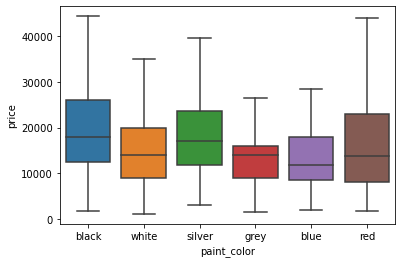

In [122]:
# Color boxplot
ax=sns.boxplot(x="paint_color", y="price", data=Chev_Silver1500_color_above_50, showfliers = False)

Black and Silver cars are a bit more expensive than the rest.  

### Next we check the price dependencies for the Ram 1500 model

*Correlation table & scatter plots*

                       price   car_age  odometer  condition_category
price               1.000000 -0.792903 -0.751490            0.440602
car_age            -0.792903  1.000000  0.612334           -0.393903
odometer           -0.751490  0.612334  1.000000           -0.373289
condition_category  0.440602 -0.393903 -0.373289            1.000000


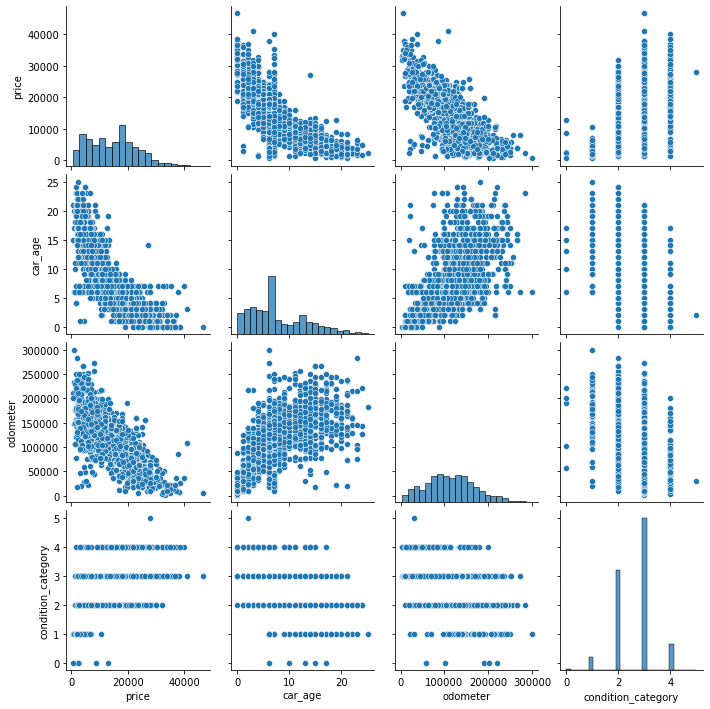

In [123]:
# Checking Price, Mileage, and Condition effects on ram 1500: 

ram_1500_data = cars_clean[(cars_clean.model == 'ram 1500')]
#ford_f150_data
for_scatter=ram_1500_data[['price', 'car_age', 'odometer','condition_category']]

print('*Correlation table & scatter plots*')
print()
print(sns.pairplot(for_scatter))
print(for_scatter.corr())

We see a strong negative correlation between car age and price (-0.79), and between price and mileage (-0.75);  and a medium possitive correlation (0.44) between price and condition, for the Ram 1500 model. 

In [124]:
# Checking categorical values
##Making sure that we have more than 50 listings per sub category

print(ram_1500_data['transmission'].value_counts())
print()
print(ram_1500_data['paint_color'].value_counts() )


automatic    1365
manual         31
other           9
Name: transmission, dtype: int64

white     293
other     260
black     241
grey      146
red       137
silver    130
blue      114
custom     28
green      22
brown      20
orange      6
purple      4
yellow      4
Name: paint_color, dtype: int64


In [125]:
# Filtering values, keeping only those above 50
ram_1500_transmission_above_50 = ram_1500_data.query('transmission == "automatic"')
ram_1500_color_above_50 = ram_1500_data.query('paint_color != ["other", "orange", "yellow", "purple", "custom", "brown", "green"]') 

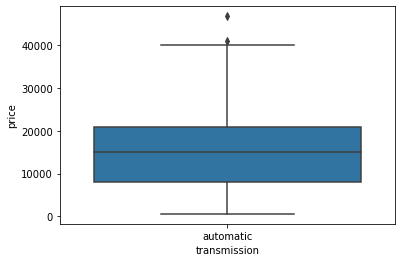

In [126]:
# Transmission boxplot
ax=sns.boxplot(x="transmission", y="price", data=ram_1500_transmission_above_50)

We cannot compare different transmission types due to lack of observations.

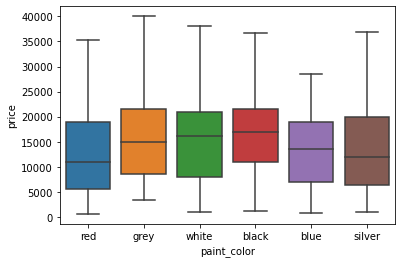

In [127]:
# Color boxplot
ax=sns.boxplot(x="paint_color", y="price", data=ram_1500_color_above_50, showfliers = False)

Again, price doesn't seems to be effected by color much. Red cars seem slightly cheaper than the rest. 

## General conclusion


#### process summery:  

In this project I studied data collected over the last few years in order to determine which factors influence the price of a vehicle, and gather insights about ads lifespan.  

.

A) Initially our dataset consisted of 51525 rows of data, and 13 columns. 

.

B) NaNs were found under:
   - model_year (3619 values, 7% of the population),
   - cylinders (5260 values, 10.2% ),
   - odometer (7892 values, 15.3% ),
   - paint_color (9267 values, 18% ),
   - is_4wd (25953 values, 50.3% )


Model_year NaNs were filled based on medians per car model.

Cylinder NaNs were filled based on medians per model and model_year. 

and 4 wheeled NaNs were converted to 0s, representing vehicle with no 4X4 wheels. 

Color NaNs were missing at random, and left as is. 

Mileage (odometer) NaNs were missing at random, and left as is. 

.

C) I discovered some suspicious looking entries where mileage values of new cars were close to zero. It wasn't clear whether the mistakes were located under mileage or under age; regardless, these rows were trimmed out, and dealt with as outliers. 

.

D) The 'condition' column values were replaced with numeric scale to allow easier calculations. 

.

F) The date_posted column was changed into a 'datetime' type, and was divided into year, month, and day of the week columns. 
The vehicle's age was calculated based on the date the ad was posted, and on the model year. 

.

G) Our dataframe had no duplicates. 

.

H) A function was used to automatically detect outliers, followed by a manual in-depth assessment of the 5 core parameters: price, age, mileage, number of cylinders, and vehicle's condition.

.

I) Price, Car Age, and Mileage were found to be positively skewed.

.

J) The statistical and visual analysis process, yielded the following outlier limits for:
   - Price: [ 500, 50,000 ]
   - Car Age: [ 0, 25 ]
   - Mileage (Odometer): [ 1000, 300,000 ]

.

K) Our clean dataframe consisted of 40795 rows and 16 columns.

.

Following the preprocessing stage, I moved on to study ads lifetime, and price dependencies. 
After a meticulous EDA analysis I've reach the following conclusions: 



### General conclusions:




#### Regarding ads lifetime:


    - the distribution was skewed to the right.
        - mean = 39.6 days
        - median = 33.0 days
        
    - 75% of the ads were listed for 53 days or less.

    - Surprisingly enough, a pearson correlation analysis revealed the lifespan was not correlated with any of the other core parameters, and hence not effected by them. The weak-to-non-existent correlation remained, even when checking Ads with only short or long lifespans.
    
    - In addition, a visual chart analysis revealed that medians fluctuated among and within car model groups, without any visible trends.
    
.

.
    
#### Regarding prices:


    - The cars with the highest average prices were chevrolet silverado 1500 crew, ram 3500, and ford mustang gt coupe 2d. 
        - Their avg. prices ranged from ~25000 to ~29300. 
        - Relatively low number of ads were posted for these models (250 - 316 ads); 
        - and they were listed for average time periods of roughly 40 days.
        
        
    - the 3 vehicle types with the most ads on website were: 
        - 'ford f-150' (2233 ads);
        - 'chevrolet silverado 1500' (1766 ads); 
        - 'ram 1500' (1405 ads).
    
    - For the ford f-150 model: 
        - We saw a strong negative correlation between price and age (-0.77) and between price and mileage (-0.7);  
        - and a medium positive correlation (0.42) between price and car condition.
        - Price was not heavily affected by color, though grey cars were a bit more expensive than the others.
        
    - For the Chevrolet Silverado 1500 model:
        - We saw a strong negative correlation between car age and price (-0.79), and between price and mileage (-0.78); 
        - and a medium positive correlation (0.35) between price and car condition.
        - Black and Silver cars were a bit more expensive than the rest.
        
    - For the Ram 1500 model:
        - We saw a strong negative correlation between car age and price (-0.79), and between price and mileage (-0.75); 
        - and a medium positive correlation (0.44) between price and condition.
        - Price was not affected by color much, though red cars seem slightly cheaper than the rest.
        
    - It was not possible to compare different transmission types in any of the models due to lack of observations.
    - For automatic gear, the price box-plots of all 3 models seemed very much the same. 
